# Inference with imbalanced testset on all 3 ConvNext runs and de novo run

<b> What is done here? <b>

The 4 models have already been (re)trained and now we just use the new testset which contains 2000 instances of all classes except class 5 (screening) with 10000 instances and visualize the reuslts here.

In [1]:
!pip install numpy==1.26.4 torch==2.1.0 torchvision==0.16.0 \
    transformers==4.48.1 pillow==9.2.0 anndata==0.10.3 scanpy==1.9.6 \
    matplotlib gputil leidenalg umap-learn h5py requests \
    "scikit-learn>=0.24" statsmodels==0.14.4 session-info patsy \
    safetensors==0.5.2 tokenizers==0.21.0 huggingface-hub==0.27.1 \
    llvmlite==0.44.0 numba==0.61.0 stdlib-list==0.11.0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 18.2 MB 3.3 MB/s eta 0:00:01
     |██████████████████              | 377.5 MB 212.8 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████      | 544.3 MB 207.5 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 670.2 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 170.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 173.1 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 113.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 180.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 171.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 163.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 169.7 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 153.3 MB/s eta 0:00:01
     |████████████████████████████████| 461 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 160.9 MB/s eta 0:00:01
     |████████████████████████████████| 450 kB 162.7 MB/s eta 0:00:01
     |████████████████████████████████| 42.4 MB 145.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 161.4 MB/s eta 0:00:01
     |█████████████

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 121.6 MB 169.1 MB/s eta 0:00:01
     |████████████████████████████████| 124.2 MB 164.4 MB/s eta 0:00:01
     |████████████████████████████████| 196.0 MB 200.2 MB/s eta 0:00:01
     |████████████████████████████████| 23.7 MB 132.0 MB/s eta 0:00:01
     |████████████▊                   | 290.3 MB 229.0 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 731.7 MB 222.4 MB/s eta 0:00:01
     |████████████████████████████████| 56.5 MB 176.6 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 165.9 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 172.8 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 60.0 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 169.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 171.3 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 79.8 MB/s eta 0:00:01
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7408 sha256=5ce01b08cf6fe9a4d86318881780dc90dcce36042dde5562c20779a7ad17d31f
  Stored in directory: /tmp/pip-ephem-wheel-cache-d2u8l6nt/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8042 sha256=b060be485a5bf740d7300f929f0d762520131a8c27408e1af4790aa6cb9f32ab
  Sto

In [2]:
!pip install matplotlib-venn matplotlib numpy upsetplot venn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 40 kB 2.5 MB/s eta 0:00:01
  distutils: /tmp/pip-build-env-5fyxq8jw/normal/lib/python3.10/site-packages
  sysconfig: /tmp/pip-build-env-5fyxq8jw/normal/local/lib/python3.10/dist-packages
  distutils: /tmp/pip-build-env-5fyxq8jw/normal/lib/python3.10/site-packages
  sysconfig: /tmp/pip-build-env-5fyxq8jw/normal/local/lib/python3.10/dist-packages
  user = False
  home = None
  root = None
  prefix = '/tmp/pip-build-env-5fyxq8jw/normal'
  distutils: /tmp/pip-build-env-5fyxq8jw/overlay/lib/python3.10/site-packages
  sysconfig: /tmp/pip-build-env-5fyxq8jw/overlay/local/lib/python3.10/dist-packages
  distutils: /tmp/pip-build-env-5fyxq8jw/overlay/lib/python3.10/site-packages
  sysconfig: /tmp/pip-build-env-5fyxq8jw/overlay/local/lib/python3.10/dist-packages
  user = False
  home = None
  root = None
  prefix = '/tmp/pip-build-env-5fyxq8jw/overlay'
  Installing build dependencies .

In [3]:
import numpy
print(numpy.__version__)

1.26.4


In [1]:
# Standard library imports
import os
import re
import glob
import random
#import pandas as pd
import pickle
from collections import Counter

# Third-party imports
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Subset
import torchvision
from torchvision import transforms, utils
import numpy as np
import h5py
import umap
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import requests
import umap.umap_ as umap

# Transformers library imports
from transformers import AutoImageProcessor, ConvNextModel, ConvNextConfig

# Project-specific imports
from sparcscore.ml.datasets import HDF5SingleCellDataset
from sparcscore.ml.transforms import RandomRotation, GaussianNoise, ChannelReducer, ChannelSelector
from sparcscore.ml.utils import combine_datasets_balanced
from sparcscore.ml.pretrained_models import autophagy_classifier2_1

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


In [3]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 1.8 MB 3.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    distutils: /usr/bin
    sysconfig: /usr/local/bin
    user = False
    home = None
    root = None
    prefix = None
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [ ]:
#feature_extractor = AutoImageProcessor.from_pretrained("facebook/convnext-xlarge-224-22k")
feature_extractor = AutoImageProcessor.from_pretrained("facebook/convnext-xlarge-224-22k", do_rescale=False)

### Retrain ConvNeXt 

1) on a couple thousand instances of the classes 0 and 2 to be able to compare it with the de novo model results and 2) on a couple thousand instances of the classes 0,1 and 2.

We only pass a few thousand examples in order not to train it too much for it to “forget”. Then plot the UMAP of the same balanced testset instances containing all 6 biological classes.

In [10]:
def sample_cells(dataset, class_label, n_samples, exclude_indices=[]):
    # Get all valid entries for the given class_label
    valid_entries = [entry for entry in dataset.data_locator if entry[0] == class_label]
    
    # entry[2] gives the index within that specific dataset
    cell_indices = [(entry[1], entry[2]) for entry in valid_entries]  # (handle_id, cell_index) tuple
    
    # Remove excluded indices 
    cell_indices = [ci for ci in cell_indices if ci[1] not in exclude_indices]

    # ccheck if the available cells are fewer than requested
    if len(cell_indices) < n_samples:
        print(f"Warning: Requested {n_samples} samples, but only {len(cell_indices)} available.")
        n_samples = len(cell_indices)
    
    sampled_indices = random.sample(cell_indices, n_samples) # Returns (handle_id, cell_index) pairs
    
    return sampled_indices  

In [11]:
def create_trainset(dataset, train_filename_template, testset_indices, class_labels, n_samples_per_class=100000):
    trainset_indices = {}

    # Flatten testset indices so that we can exclude them from the training set
    testset_all_indices = set([(entry[0], entry[1]) for entries in testset_indices.values() for entry in entries])

    # Sample cells from the selected classes, excluding testset indices
    for class_label in class_labels:
        print(f"Sampling for class {class_label}")
        
        # Sample cells and exclude those that are already in the test set
        sampled_cell_indices = sample_cells(dataset, class_label, n_samples_per_class, exclude_indices=testset_all_indices)
        trainset_indices[class_label] = sampled_cell_indices
        
        # Save each class' training set to a separate HDF5 file
        train_filename = train_filename_template.format(label=class_label)
        
        with h5py.File(train_filename, 'w') as f:
            # Create lists to store data before writing to HDF5
            cell_data_list = []
            cell_index_list = []
            annotation_list = []
            
            # Track local index (starting from 0 for each new file)
            local_index = 0
            
            # Loop over the sampled cell indices
            for global_cell_id, (handle_id, cell_index) in enumerate(sampled_cell_indices):
                # Retrieve the correct entry from data_locator using (handle_id, cell_index) pair
                entry = next((entry for entry in dataset.data_locator if entry[1] == handle_id and entry[2] == cell_index), None)
                
                if entry is None:
                    print(f"Warning: No entry found for handle_id {handle_id} and cell_index {cell_index}. Skipping.")
                    continue

                try:
                    # Retrieve the single-cell data from the correct handle
                    data = dataset.handle_list[handle_id][cell_index] 
                except KeyError:
                    print(f"Error: Data not found for handle_id {handle_id}, cell_index {cell_index}.")
                    continue

                # The class label (from the data locator)
                label = entry[0]  # Class label from the entry

                # Append data and the corresponding local index for this file
                cell_data_list.append(data)
                
                # Use local_index (for the new train file) and the original cell_index
                cell_index_list.append([local_index, local_index])  # Use local_index and the original cell_index
                
                # Annotation: store local_index, original cell_index, and class label as encoded strings
                annotation_list.append([str(local_index).encode(), str(cell_index).encode(), str(label).encode()])

                local_index += 1  # Increment the local index for each cell

            # Convert lists to numpy arrays before saving
            if len(cell_data_list) > 0:
                single_cell_data = np.array(cell_data_list, dtype='float16')  # Shape: (n_cells, channels, height, width)
                single_cell_index = np.array(cell_index_list, dtype=np.uint64)  # Shape: (n_cells, 2)
                annotation = np.array(annotation_list, dtype='S')  # Shape: (n_cells, 3), string-encoded data

                # Write to HDF5
                f.create_dataset('single_cell_data', data=single_cell_data, dtype='float16')
                f.create_dataset('single_cell_index', data=single_cell_index, dtype='uint64')
                f.create_dataset('annotation', data=annotation, dtype=h5py.special_dtype(vlen=bytes))
            else:
                print(f"Warning: No valid data found for class {class_label}.")
    
    return trainset_indices

In [5]:
# Check for overlap between testset and trainset indices
def check_overlap(testset_indices, trainset_indices):
    testset_all_indices = set([idx for indices in testset_indices.values() for idx in indices])  # Flatten testset indices
    trainset_all_indices = set([idx for indices in trainset_indices.values() for idx in indices])  # Flatten trainset indices
    overlap = testset_all_indices.intersection(trainset_all_indices)
    
    if overlap:
        print(f"Warning: Overlapping indices found between testset and trainset: {overlap}")
    else:
        print("No overlap between testset and trainset.")

In [40]:
os.chdir('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/balanced_testset_all_classes/')
files = os.listdir()
print("Files in 230714_autophagy_training_data_sample:")
for file in files:
    print(file)
print("\n")

Files in 230714_autophagy_training_data_sample:
balanced_testset.pt
testset_0.h5
testset_1.h5
testset_indices.pkl
testset_5.h5
testset_3.h5
testset_4.h5
testset_2.h5




In [49]:
full_hdf5_data = HDF5SingleCellDataset(
    dir_list=['/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_EI24KO_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_EI24KO_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_EI24KO_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_EI24KO_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_EI24KO_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_EI24KO_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_A002/single_cells.h5', 
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_B004/single_cells.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_D001/single_cells.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_F003/single_cells.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_H002/single_cells.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231004_autophagy_screen_6slides/2.3_K001/single_cells.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_01_stim_Cr203_C6_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_02_stim_Cr203_C6_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_2.2_stim_Cr203_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_2.3_stim_Cr203_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_01_stim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_2.2_stim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_2.3_stim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_02_stim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_1_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_2_14h.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_01_unstim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_02_unstim_wt_filtered.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_1_0d.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_2_0d.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_1_0d.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_2_0d.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_1_0d.h5',
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_2_0d.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_1_4h.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0316_EI24_fixed_tc/231018_0316_EI24_fixed_tc_WT_2_4h.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_1_4h.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0317_EI24_fixed_tc/231018_0317_EI24_fixed_tc_WT_2_4h.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_1_4h.h5',
             '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/231018_EI24_timecourse_phenix/231018_0318_EI24_fixed_tc/231018_0318_EI24_fixed_tc_WT_2_4h.h5'],
    dir_labels=[4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3], 
    root_dir='/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/',
    select_channel=4,  # Select the 5th channel (channel index 4)
    return_id=False
)

Total: 3426407
0: 407464
1: 209030
2: 400000
3: 9346
4: 7476
5: 2393091


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load configuration for ConvNext
config = ConvNextConfig.from_pretrained("facebook/convnext-xlarge-224-22k")

# Define a custom model with a classification head
class ConvNextWithCustomFC(ConvNextModel):
    def __init__(self, config, num_classes=2):
        super().__init__(config)
        # Add a fully connected layer for classification
        self.fc = nn.Linear(config.hidden_sizes[-1], num_classes)

    def forward(self, pixel_values, **kwargs):
        # Forward pass through the base ConvNextModel
        outputs = super().forward(pixel_values, **kwargs)
        
        # Extract the embeddings
        if hasattr(outputs, 'pooler_output') and outputs.pooler_output is not None:
            embeddings = outputs.pooler_output
        else:
            embeddings = outputs.last_hidden_state.mean(dim=1)  # Fallback to mean pooling
        
        # Pass embeddings through the classification head
        logits = self.fc(embeddings)
        return logits, embeddings

# Initialize custom model
model = ConvNextWithCustomFC.from_pretrained("facebook/convnext-xlarge-224-22k", config=config, num_classes=3)
model.to(device)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of ConvNextWithCustomFC were not initialized from the model checkpoint at facebook/convnext-xlarge-224-22k and are newly initialized: ['convnext.fc.bias', 'convnext.fc.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ConvNextWithCustomFC(
  (embeddings): ConvNextEmbeddings(
    (patch_embeddings): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
    (layernorm): ConvNextLayerNorm()
  )
  (encoder): ConvNextEncoder(
    (stages): ModuleList(
      (0): ConvNextStage(
        (downsampling_layer): Identity()
        (layers): Sequential(
          (0): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
            (act): GELUActivation()
            (pwconv2): Linear(in_features=1024, out_features=256, bias=True)
            (drop_path): Identity()
          )
          (1): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
     

In [5]:
def load_dataset(save_path, batch_size):
    """
    Load dataset with images, labels, and cell IDs.

    Parameters:
    - save_path: Path where the dataset is stored
    - batch_size: Batch size for DataLoader

    Returns:
    - DataLoader for the dataset
    """
    images_tensor, labels_tensor, cell_ids_tensor = torch.load(save_path)

    # Create a TensorDataset from the loaded tensors
    dataset = torch.utils.data.TensorDataset(images_tensor, labels_tensor, cell_ids_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    print(f"Loaded dataset from {save_path}")
    return data_loader

# Load the balanced test dataset
test_data_loader = load_dataset(
    "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/balanced_testset_all_classes/balanced_testset_big.pt",
    batch_size=64
)

Loaded dataset from /dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/balanced_testset_all_classes/balanced_testset_big.pt


#### Case 1 [0,2 | balanced testset] with only 1000 instances per class (small!)

In [10]:
train_class_labels = [0, 2] 

In [11]:
balanced_trainset_class_0_and_2 = HDF5SingleCellDataset(
    dir_list=[f'/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/trainset_{label}.h5' for label in train_class_labels],
    dir_labels=train_class_labels,  # The class labels
    root_dir='/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/',  
    select_channel=4,  # Select the 5th channel
    return_id=False
)

Total: 2000
0: 1000
2: 1000


In [14]:
# Save the trainset_indices to a file
with open('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/trainset_indices.pkl', 'wb') as f:
    pickle.dump(trainset_indices, f)

In [12]:
# Load the trainset_indices from the file
with open('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/trainset_indices.pkl', 'rb') as f:
    trainset_indices = pickle.load(f)

In [6]:
# Load data: Balanced trainset for classes 0 and 2
train_class_labels = [0, 2]
balanced_trainset_class_0_and_2 = HDF5SingleCellDataset(
    dir_list=[
        f'/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/trainset_{label}.h5'
        for label in train_class_labels
    ],
    dir_labels=train_class_labels,  # Class labels
    root_dir='/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case1_balanced_trainingset_small/',
    select_channel=4,  # Select the 5th channel
    return_id=False
)
train_loader = DataLoader(balanced_trainset_class_0_and_2, batch_size=64, shuffle=True, num_workers=8)

Total: 2000
0: 1000
2: 1000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
def convert_to_rgb(inputs):
    # Convert to (batch_size, 3, height, width) by repeating the channel 3 times
    return inputs.repeat(1, 3, 1, 1) 

In [6]:
# Define the directory and filename
save_dir = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
model_filename = "model_case_1_1000_instances.pth"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, model_filename)

In [9]:
# Load the saved model
model.load_state_dict(torch.load(model_path))
model.to(device)

ConvNextWithCustomFC(
  (embeddings): ConvNextEmbeddings(
    (patch_embeddings): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
    (layernorm): ConvNextLayerNorm()
  )
  (encoder): ConvNextEncoder(
    (stages): ModuleList(
      (0): ConvNextStage(
        (downsampling_layer): Identity()
        (layers): Sequential(
          (0): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
            (act): GELUActivation()
            (pwconv2): Linear(in_features=1024, out_features=256, bias=True)
            (drop_path): Identity()
          )
          (1): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
     

In [12]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  

# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [20]:
import pickle
import os

# Define the save path
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_1000_instances_big.pkl"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save embeddings, labels, and cell_ids using pickle
with open(os.path.join(save_path, file_name), 'wb') as f:
    pickle.dump({'embeddings': embeddings, 'labels': labels_list, 'cell_ids': cell_ids_list}, f)

print(f"Saved embeddings, labels, and cell_ids to {os.path.join(save_path, file_name)}")

Saved embeddings, labels, and cell_ids to /dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/case_1_1000_instances_big.pkl


In [42]:
import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_1000_instances_big.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

Loaded embeddings shape: (20000, 2048)
Loaded labels shape: (20000,)
Loaded cell_ids shape: (20000,)


In [43]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

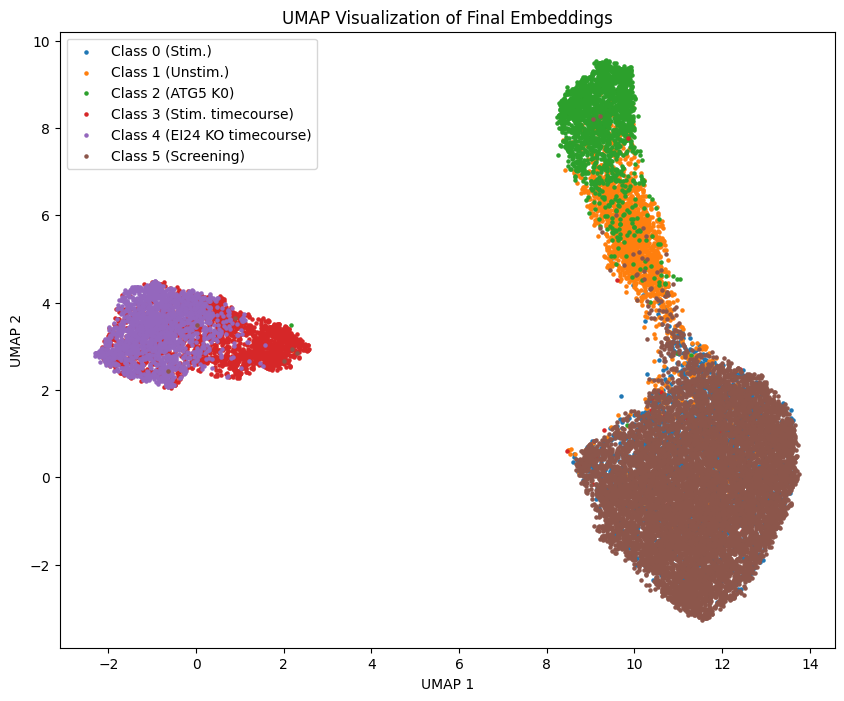

In [44]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Visualize UMAP
plt.figure(figsize=(10, 8))

for i, label in enumerate(class_labels):
    # Select indices for each class
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend()
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

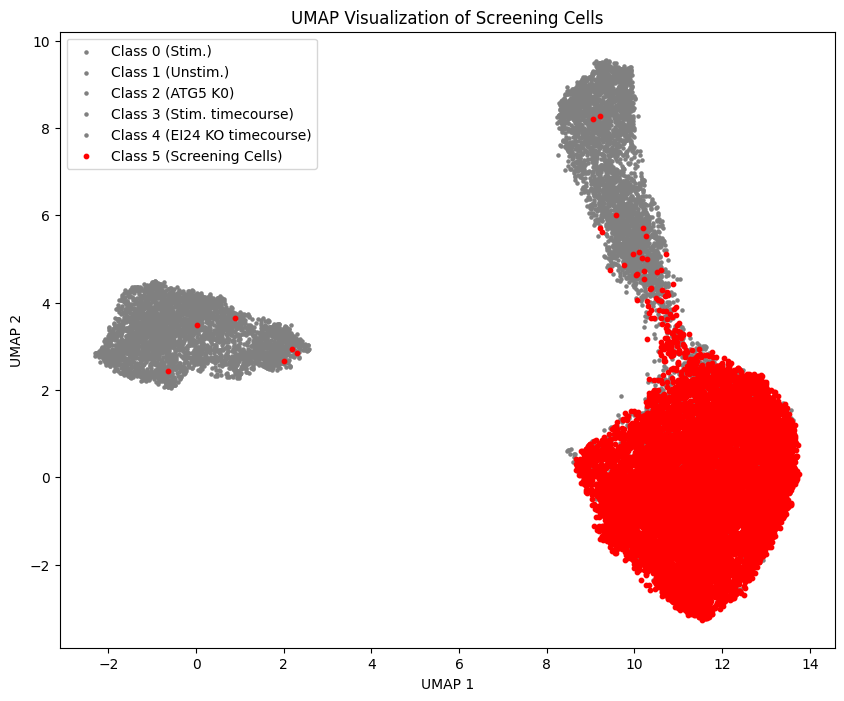

In [45]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", 
                "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Plotting UMAP only for Screening cells
plt.figure(figsize=(10, 8))

# Plot cells belonging to other classes in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude the last class (screening)
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', label=label, s=5)

# Plot cells belonging to class 5 (screening) with red color
screening_idx = labels_list == 5
plt.scatter(umap_result[screening_idx, 0], umap_result[screening_idx, 1], color='red', label='Class 5 (Screening Cells)', s=10)

# Add legend and labels
plt.legend()
plt.title('UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Show plot
plt.show()

In [47]:
# Extract UMAP coordinates
x_coords = umap_result[:, 0]  # UMAP X-coordinates
y_coords = umap_result[:, 1]  # UMAP Y-coordinates

# Identify screening cells (Class 5)
screening_idx = labels_list == 5

# Keep only Class 5 cells **outside** the block: x <= 7 and y >= 2
filtered_idx = screening_idx & (y_coords >= 3)

# Extract the filtered cell IDs
filtered_cell_ids = cell_ids_list[filtered_idx]

# Save the filtered cell IDs to a file
save_path = "./convnext_output_files/case1_1000_cells_outside_block_screening_hits_big_testset.txt"
np.savetxt(save_path, filtered_cell_ids, fmt="%d")

print(f"Saved {len(filtered_cell_ids)} cell IDs to {save_path}")

Saved 92 cell IDs to ./convnext_output_files/case1_1000_cells_outside_block_screening_hits_big_testset.txt


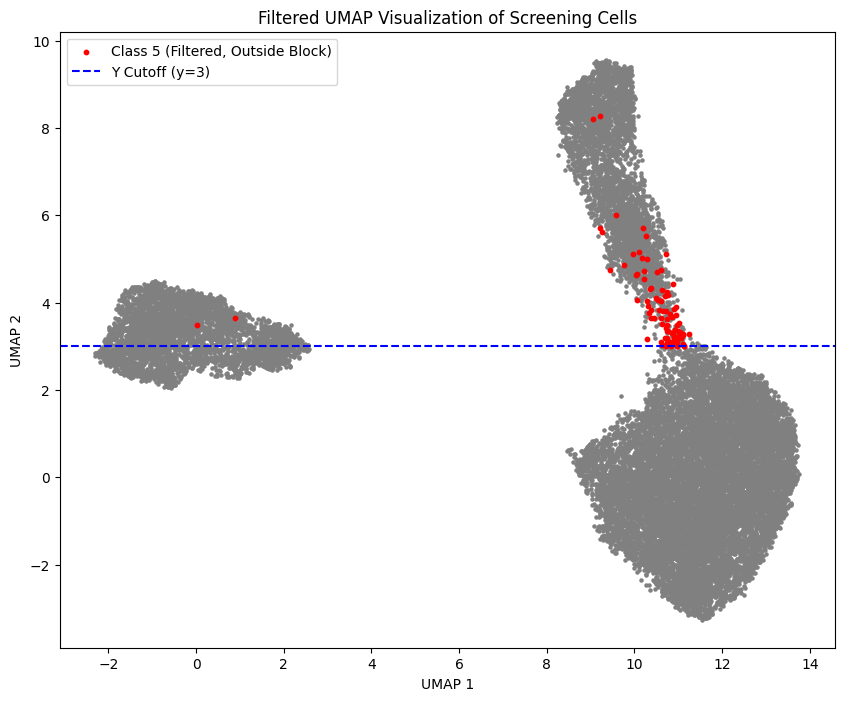

In [48]:
# Plot UMAP with Updated Cutoff
plt.figure(figsize=(10, 8))

# Plot all other classes (0-4) in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude class 5
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', s=5)

# Get all screening cell indices (class 5)
screening_idx = labels_list == 5

# Plot non-filtered screening cells in grey
non_filtered_screening_idx = screening_idx & ~filtered_idx
plt.scatter(umap_result[non_filtered_screening_idx, 0], umap_result[non_filtered_screening_idx, 1],
            color='grey', s=5)

# Plot filtered screening cells (outside block) in red
plt.scatter(x_coords[filtered_idx], y_coords[filtered_idx],
            color='red', label='Class 5 (Filtered, Outside Block)', s=10)

# Draw Y cutoff line
plt.axhline(y=3, color='blue', linestyle='--', label='Y Cutoff (y=3)')

plt.legend()
plt.title('Filtered UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [29]:
import numpy as np
import pandas as pd
import umap
import umap.umap_ as umap  # Correct way
import matplotlib.pyplot as plt

# Define binning function based on autophagy_off score
def assign_bin(score):
    if score > 0.99999:
        return "bin 1"
    elif score > 0.999:
        return "bin 2"
    elif score > 0.9975:
        return "bin 3"
    elif score > 0.995:
        return "bin 4"
    elif score > 0.99:
        return "bin 5"
    elif score > 0.98:
        return "bin 6"
    else:
        return "other"

    
# Step 2: Apply binning function to create a new column
df = pd.read_csv("autophagy21_classification_scores_big_testset.csv")
df

cell_ids_to_find = ["349419", "388844", "495795", "499718", "495419", "412462", 
               "469096", "435097", "385373", "460167", "143864", "445937", 
               "444025", "379006", "411852", "149351", "463573", "500807", 
               "64637", "126920", "464924", "501087", "474071", "446082", 
               "451082", "362618", "474801", "387731", "496974", "465136", 
               "501832", "336884", "67210", "49425", "127065", "496681", 
               "439363", "109260", "390383", "239306", "225548", "376725", 
               "138348", "123345", "383566", "442577", "501247", "500591", 
               "445269", "323137", "174804"]


# Apply binning function to the dataframe
df["Bin"] = df["Autophagy Off Score"].apply(assign_bin)
df["Cell ID"] = df["Cell ID"].astype(str)
df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
0         439        6.700127e-02         9.329987e-01  other
1      293873        5.018042e-07         9.999995e-01  bin 1
2        1437        7.523392e-01         2.476609e-01  other
3      437630        1.878466e-06         9.999981e-01  bin 1
4       80815        9.999956e-01         4.432396e-06  other
...       ...                 ...                  ...    ...
11995  469873        9.998048e-01         1.952647e-04  other
11996  316062        3.255916e-05         9.999675e-01  bin 2
11997  179090        9.619690e-01         3.803107e-02  other
11998  247275        2.832826e-06         9.999971e-01  bin 1
11999  104042        9.999999e-01         7.556392e-08  other

[12000 rows x 4 columns]

In [30]:
# Merge bin information into filtered_df
filtered_df = df[df["Cell ID"].isin(cell_ids_to_find)]
filtered_df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
54     442577        7.056355e-01             0.294365  other
767    495795        9.986193e-01             0.001381  other
2076   451082        3.741750e-05             0.999963  bin 2
3259   123345        9.752958e-01             0.024704  other
3355   444025        1.603911e-05             0.999984  bin 2
3417   465136        5.560375e-03             0.994440  bin 5
3571   435097        2.896643e-03             0.997103  bin 4
3599   390383        1.044057e-03             0.998956  bin 3
5272   362618        3.048065e-03             0.996952  bin 4
5331   225548        2.254619e-01             0.774538  other
5564   239306        3.115702e-02             0.968843  other
5677    64637        1.652629e-04             0.999835  bin 2
6148   109260        5.162585e-01             0.483741  other
6167   445937        5.950180e-05             0.999941  bin 2
6596   412462        4.086442e-04             0.999591  bin 2
7574   439363        2.535472e-04             0.999746  bin 2
7681   474071        5.001426e-05             0.999950  bin 2
7750   496681        5.460521e-04             0.999454  bin 2
7822   126920        6.546738e-02             0.934533  other
8114   495419        1.329383e-02             0.986706  bin 6
8499   500591        9.967968e-01             0.003203  other
8773   387731        1.704567e-04             0.999830  bin 2
8925   127065        6.567348e-07             0.999999  bin 1
9044   499718        9.986368e-01             0.001363  other
9476   501087        1.876032e-04             0.999812  bin 2
9971   174804        9.999156e-01             0.000084  other
9981    49425        6.830680e-03             0.993169  bin 5
10232  446082        2.519964e-03             0.997480  bin 4
10731  501247        8.879523e-01             0.112048  other
11391  385373        4.638503e-04             0.999536  bin 2
11726  323137        2.862157e-01             0.713784  other

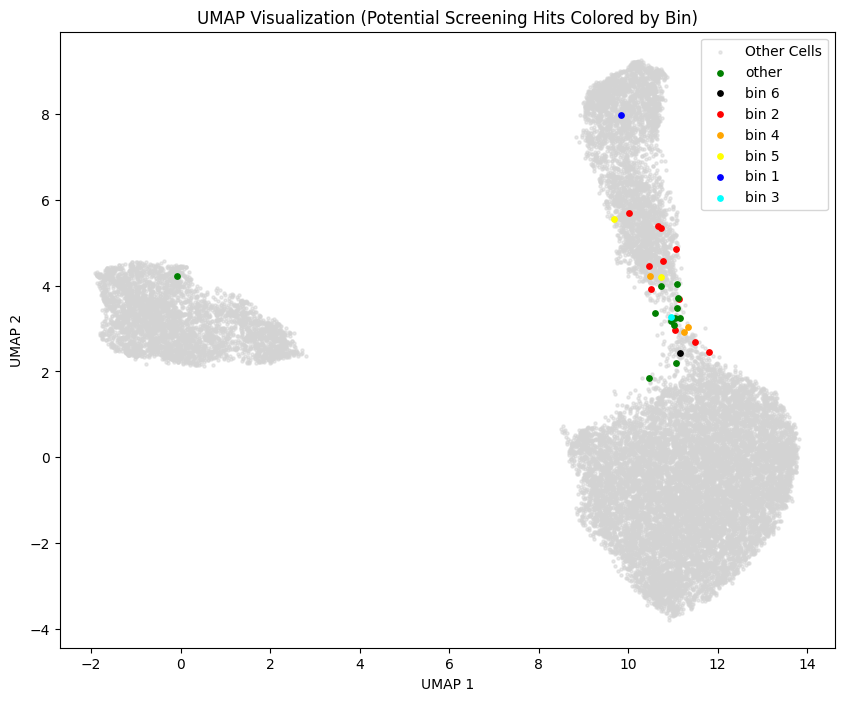

In [31]:
# Extract indices of highlighted screening cells
cell_ids_array = cell_ids_list.astype(str)  # Convert all cell IDs to string
highlighted_indices = np.isin(cell_ids_array, filtered_df["Cell ID"].values)  # Boolean mask

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Merge UMAP results with bin information
highlighted_bins = filtered_df.set_index("Cell ID").loc[cell_ids_array[highlighted_indices], "Bin"].values

# Define colors for bins
bin_colors = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black", 
    "other": "green"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot all cells in light grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='lightgrey', s=5, alpha=0.5, label="Other Cells")

# Overlay highlighted screening cells in their bin colors
for i, bin_label in enumerate(highlighted_bins):
    plt.scatter(highlighted_x[i], highlighted_y[i], color=bin_colors[bin_label], s=15, label=bin_label if bin_label not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.title('UMAP Visualization (Potential Screening Hits Colored by Bin)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)
plt.show()

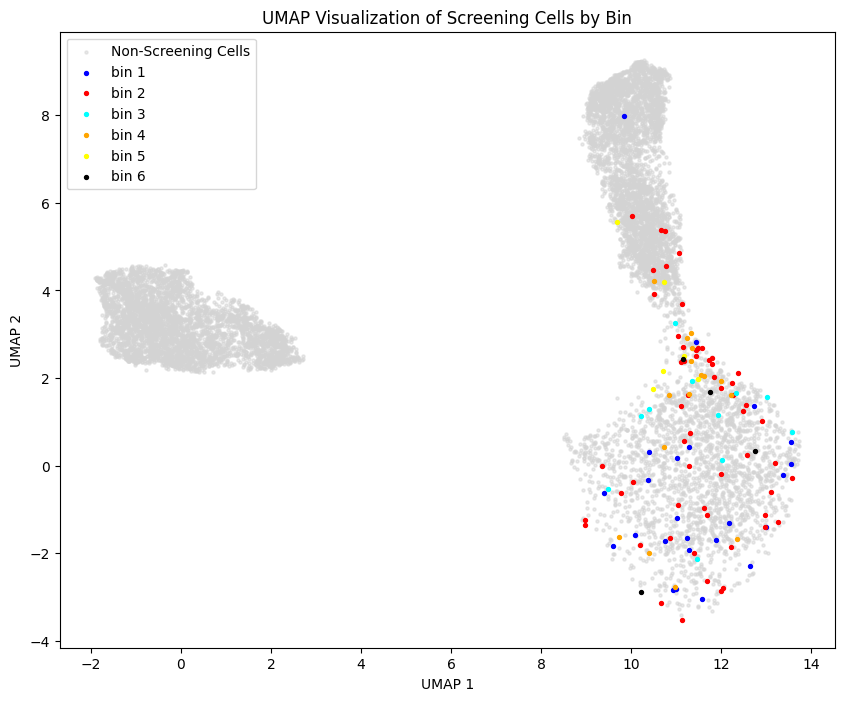

In [32]:
# Create a mapping from Cell ID to bin values
cell_id_to_bin = dict(zip(df["Cell ID"], df["Bin"]))

# Identify screening cells
screening_idx = labels_list == 5
screening_cell_ids = [str(cell_id) for cell_id in cell_ids_list[screening_idx]]

# Extract bin values for screening cells
screening_bins = [cell_id_to_bin.get(cid, "Unknown") for cid in screening_cell_ids]

# Define a color palette for bins
bin_palette = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot non-screening cells in grey
non_screening_idx = ~screening_idx
plt.scatter(umap_result[non_screening_idx, 0], umap_result[non_screening_idx, 1],
            color='lightgrey', alpha=0.5, s=5, label="Non-Screening Cells")

# Plot screening cells with bin colors
for bin_label, color in bin_palette.items():
    bin_indices = [i for i, b in enumerate(screening_bins) if b == bin_label]
    if bin_indices:
        plt.scatter(umap_result[screening_idx][bin_indices, 0], 
                    umap_result[screening_idx][bin_indices, 1],
                    color=color, s=8, label=bin_label)

plt.legend()
plt.title("UMAP Visualization of Screening Cells by Bin")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(False)

# Save the plot
output_path = "./convnext_output_files/case1_1000_cells_umap_plot_screening_cells_by_bin.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

In [9]:
# Training data is MPCDF screening data with bin information and the dir labels are the bins!
MPCDF_screening_testdata = HDF5SingleCellDataset(
    dir_list=['/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_1/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_2/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_3/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_4/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_5/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_6/single_cells_subsetted.h5'
    ],
    dir_labels=[1, 2, 3, 4, 5, 6],  # Bin labels
    root_dir='/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/',
    select_channel=4,  # Select the 5th channel
    return_id=True
)

Total: 60000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000


In [10]:
test_data_loader = DataLoader(MPCDF_screening_testdata, batch_size=64, shuffle=True, num_workers=8)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [11]:
def convert_to_rgb(inputs):
    # Convert to (batch_size, 3, height, width) by repeating the channel 3 times
    return inputs.repeat(1, 3, 1, 1) 

In [12]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  


In [13]:
# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [14]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

# Define new class labels 
class_labels = ["Bin 1", "Bin 2", "Bin 3", "Bin 4", "Bin 5", "Bin 6"]

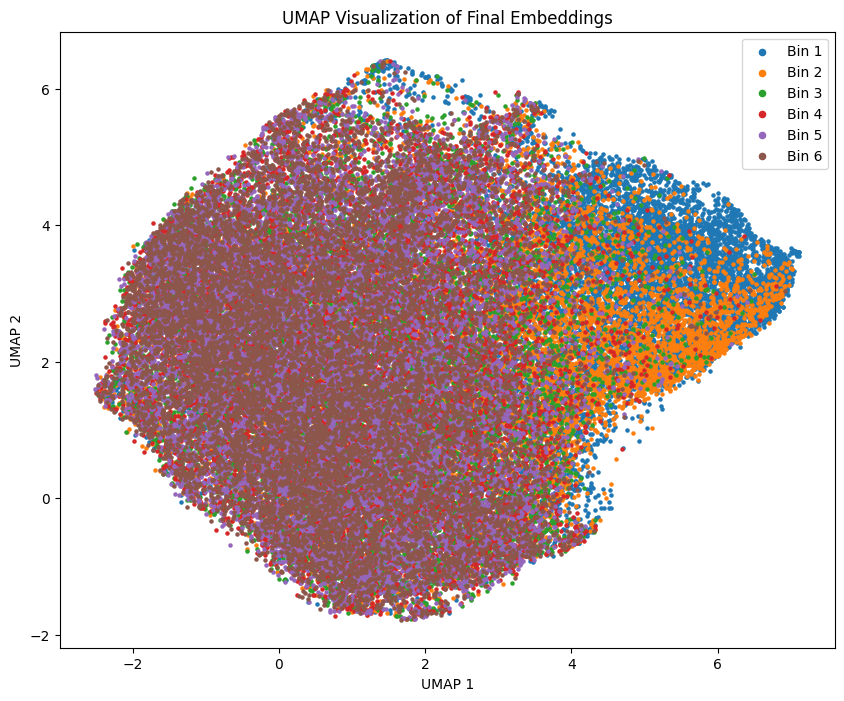

In [15]:
plt.figure(figsize=(10, 8))

labels_list = labels_list - 1

for i, label in enumerate(class_labels):
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend(markerscale=2)  # Makes legend dots larger
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

#### Case 1 [0,2 | balanced testset] with 100000 instances per class (big!)

In [22]:
# Load data: Balanced trainset for classes 0 and 2
train_class_labels = [0, 2]

balanced_trainset_class_0_and_2 = HDF5SingleCellDataset(
    dir_list=['/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_01_stim_wt_filtered.h5', 
              '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/T_01_stim_Cr203_C6_filtered.h5'],
    dir_labels=[0, 2], 
    root_dir='/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93kux/230714_autophagy_training_data_sample/',
    select_channel=4,  # Select the 5th channel (channel index 4)
    return_id=False
)

train_loader = DataLoader(balanced_trainset_class_0_and_2, batch_size=64, shuffle=True, num_workers=8)

Total: 200000
0: 100000
2: 100000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [23]:
def convert_to_rgb(inputs):
    # Convert to (batch_size, 3, height, width) by repeating the channel 3 times
    return inputs.repeat(1, 3, 1, 1)  

In [16]:
# Define the directory and filename
save_dir = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
model_filename = "model_case_1_100000_instances.pth"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, model_filename)

In [17]:
# Load the saved model
model.load_state_dict(torch.load(model_path))
model.to(device)

ConvNextWithCustomFC(
  (embeddings): ConvNextEmbeddings(
    (patch_embeddings): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
    (layernorm): ConvNextLayerNorm()
  )
  (encoder): ConvNextEncoder(
    (stages): ModuleList(
      (0): ConvNextStage(
        (downsampling_layer): Identity()
        (layers): Sequential(
          (0): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
            (act): GELUActivation()
            (pwconv2): Linear(in_features=1024, out_features=256, bias=True)
            (drop_path): Identity()
          )
          (1): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
     

In [26]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  

# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [30]:
import pickle
import os

# Define the save path
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_100000_instances_big.pkl"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save embeddings, labels, and cell_ids using pickle
with open(os.path.join(save_path, file_name), 'wb') as f:
    pickle.dump({'embeddings': embeddings, 'labels': labels_list, 'cell_ids': cell_ids_list}, f)

print(f"Saved embeddings, labels, and cell_ids to {os.path.join(save_path, file_name)}")

Saved embeddings, labels, and cell_ids to /dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/case_1_100000_instances_big.pkl


In [19]:
import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_100000_instances_big.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

Loaded embeddings shape: (20000, 2048)
Loaded labels shape: (20000,)
Loaded cell_ids shape: (20000,)


In [20]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

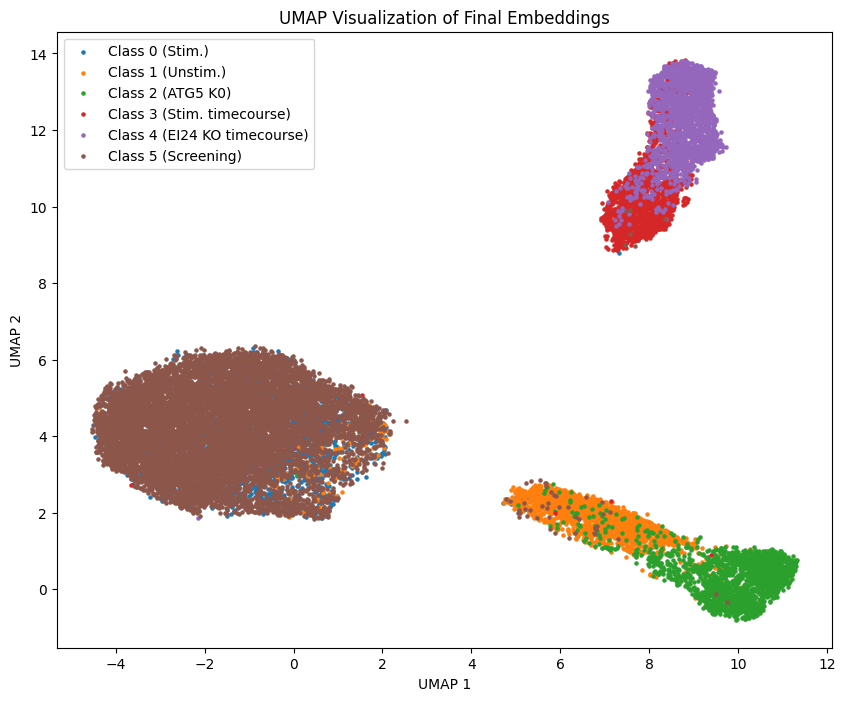

In [21]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Visualize UMAP
plt.figure(figsize=(10, 8))

for i, label in enumerate(class_labels):
    # Select indices for each class
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend()
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

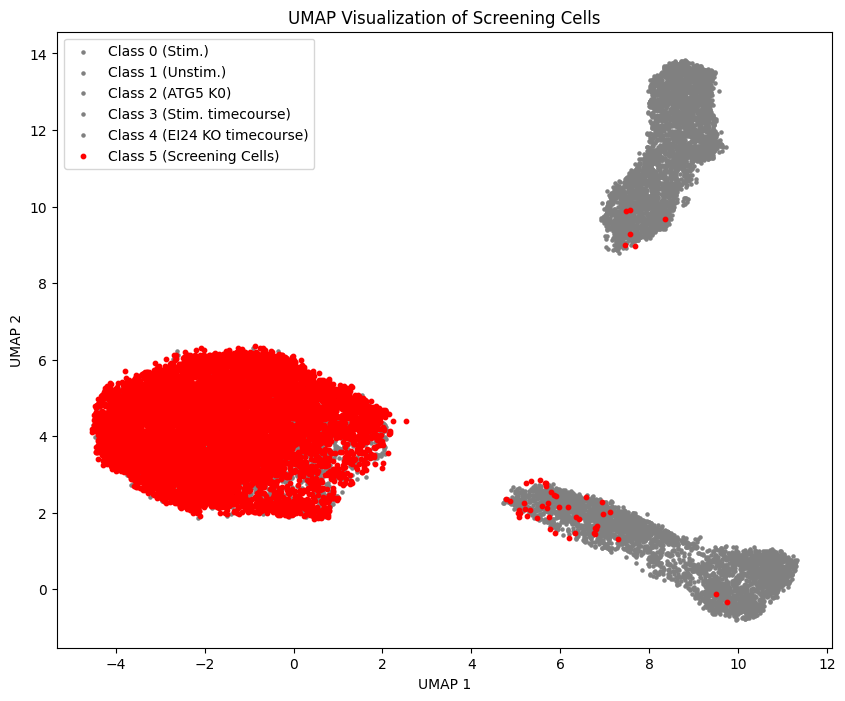

In [22]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", 
                "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Plotting UMAP only for Screening cells
plt.figure(figsize=(10, 8))

# Plot cells belonging to other classes in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude the last class (screening)
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', label=label, s=5)

# Plot cells belonging to class 5 (screening) with red color
screening_idx = labels_list == 5
plt.scatter(umap_result[screening_idx, 0], umap_result[screening_idx, 1], color='red', label='Class 5 (Screening Cells)', s=10)

# Add legend and labels
plt.legend()
plt.title('UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Show plot
plt.show()

In [23]:
# Extract UMAP coordinates
x_coords = umap_result[:, 0]  # UMAP X-coordinates
y_coords = umap_result[:, 1]  # UMAP Y-coordinates

# Identify screening cells (Class 5)
screening_idx = labels_list == 5

# Keep only Class 5 cells **outside** the block: x >= 11 and y <= 2
filtered_idx = screening_idx & ~((x_coords <= 4))

# Extract the filtered cell IDs
filtered_cell_ids = cell_ids_list[filtered_idx]

# Save the filtered cell IDs to a file
save_path = "./convnext_output_files/case1_100000_cells_outside_block_screening_hits_big.txt"
np.savetxt(save_path, filtered_cell_ids, fmt="%d")

print(f"Saved {len(filtered_cell_ids)} cell IDs to {save_path}")

Saved 50 cell IDs to ./convnext_output_files/case1_100000_cells_outside_block_screening_hits_big.txt


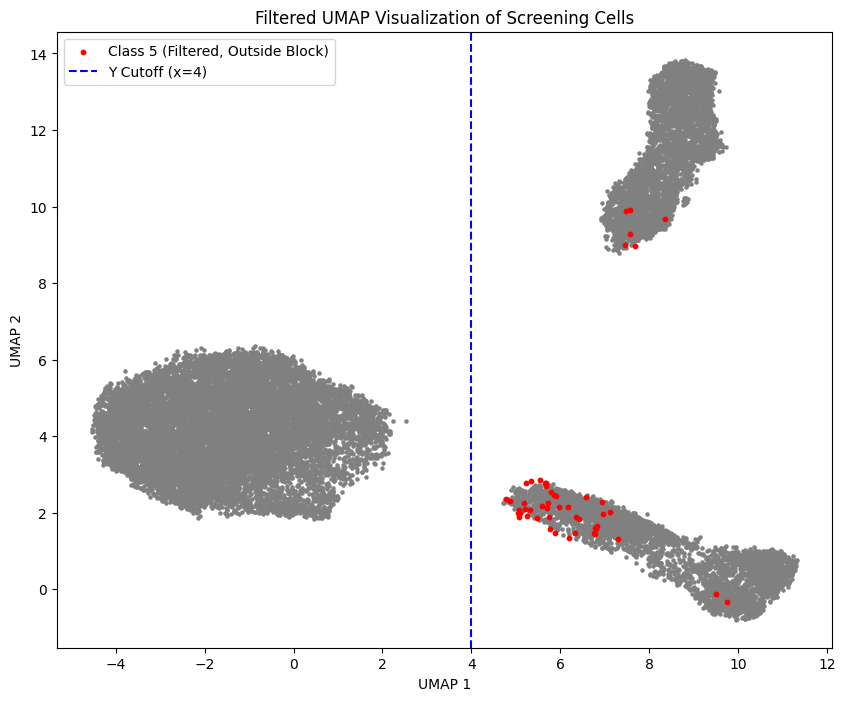

In [25]:
# Plot UMAP with Updated Cutoff
plt.figure(figsize=(10, 8))

# Plot all other classes (0-4) in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude class 5
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', s=5)

# Get all screening cell indices (class 5)
screening_idx = labels_list == 5

# Plot non-filtered screening cells in grey
non_filtered_screening_idx = screening_idx & ~filtered_idx
plt.scatter(umap_result[non_filtered_screening_idx, 0], umap_result[non_filtered_screening_idx, 1],
            color='grey', s=5)

# Plot filtered screening cells (outside block) in red
plt.scatter(x_coords[filtered_idx], y_coords[filtered_idx],
            color='red', label='Class 5 (Filtered, Outside Block)', s=10)

# Draw Y cutoff line
plt.axvline(x=4, color='blue', linestyle='--', label='Y Cutoff (x=4)')

plt.legend()
plt.title('Filtered UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [18]:
import numpy as np
import pandas as pd
import umap
import umap.umap_ as umap  # Correct way
import matplotlib.pyplot as plt

# Define binning function based on autophagy_off score
def assign_bin(score):
    if score > 0.99999:
        return "bin 1"
    elif score > 0.999:
        return "bin 2"
    elif score > 0.9975:
        return "bin 3"
    elif score > 0.995:
        return "bin 4"
    elif score > 0.99:
        return "bin 5"
    elif score > 0.98:
        return "bin 6"
    else:
        return "other"

    
# Step 2: Apply binning function to create a new column
df = pd.read_csv("autophagy21_classification_scores_big_testset.csv")
df

cell_ids_to_find = ["441961", "504043", "317591", "52894", "497255", "390902", 
               "501087", "445021", "442456", "477125", "451082", "499547", 
               "122133", "496681", "195742", "439363", "441400", "459988", 
               "381068", "470808", "127065", "445937", "336884", "442149", 
               "445269", "462045", "385373", "174804", "494847", "460167", 
               "493996", "379875", "379993", "300887", "383566", "199139", 
               "471832", "443509", "496974", "322883", "319212", "240471", 
               "493513", "445456", "260274", "376649", "49425", "217658"]

# Apply binning function to the dataframe
df["Bin"] = df["Autophagy Off Score"].apply(assign_bin)
df["Cell ID"] = df["Cell ID"].astype(str)
df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
0         439        6.700127e-02         9.329987e-01  other
1      293873        5.018042e-07         9.999995e-01  bin 1
2        1437        7.523392e-01         2.476609e-01  other
3      437630        1.878466e-06         9.999981e-01  bin 1
4       80815        9.999956e-01         4.432396e-06  other
...       ...                 ...                  ...    ...
11995  469873        9.998048e-01         1.952647e-04  other
11996  316062        3.255916e-05         9.999675e-01  bin 2
11997  179090        9.619690e-01         3.803107e-02  other
11998  247275        2.832826e-06         9.999971e-01  bin 1
11999  104042        9.999999e-01         7.556392e-08  other

[12000 rows x 4 columns]

In [19]:
# Merge bin information into filtered_df
filtered_df = df[df["Cell ID"].isin(cell_ids_to_find)]
filtered_df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
406     52894        9.997646e-01             0.000235  other
1218   322883        6.764363e-04             0.999324  bin 2
1494   317591        9.979517e-01             0.002048  other
1659   445456        6.755327e-06             0.999993  bin 1
1938   390902        9.998290e-01             0.000171  other
2076   451082        3.741750e-05             0.999963  bin 2
2230   319212        9.973715e-01             0.002628  other
3517   441961        9.963536e-01             0.003646  other
4193   379875        5.377006e-03             0.994623  bin 5
4205   300887        3.546141e-01             0.645386  other
4812   471832        9.998246e-01             0.000175  other
4972   445021        1.338151e-04             0.999866  bin 2
5088   497255        1.148232e-03             0.998852  bin 3
5668   470808        9.995335e-01             0.000466  other
6167   445937        5.950180e-05             0.999941  bin 2
6329   441400        2.105678e-04             0.999789  bin 2
7478   260274        9.972472e-01             0.002753  other
7574   439363        2.535472e-04             0.999746  bin 2
7602   504043        6.284048e-04             0.999372  bin 2
7666   493996        9.853648e-01             0.014635  other
7750   496681        5.460521e-04             0.999454  bin 2
8024   240471        1.128008e-04             0.999887  bin 2
8925   127065        6.567348e-07             0.999999  bin 1
9476   501087        1.876032e-04             0.999812  bin 2
9529   122133        4.731371e-03             0.995269  bin 4
9771   493513        6.327426e-05             0.999937  bin 2
9971   174804        9.999156e-01             0.000084  other
9981    49425        6.830680e-03             0.993169  bin 5
10721  443509        1.473589e-03             0.998526  bin 3
11391  385373        4.638503e-04             0.999536  bin 2
11676  379993        9.968098e-01             0.003190  other

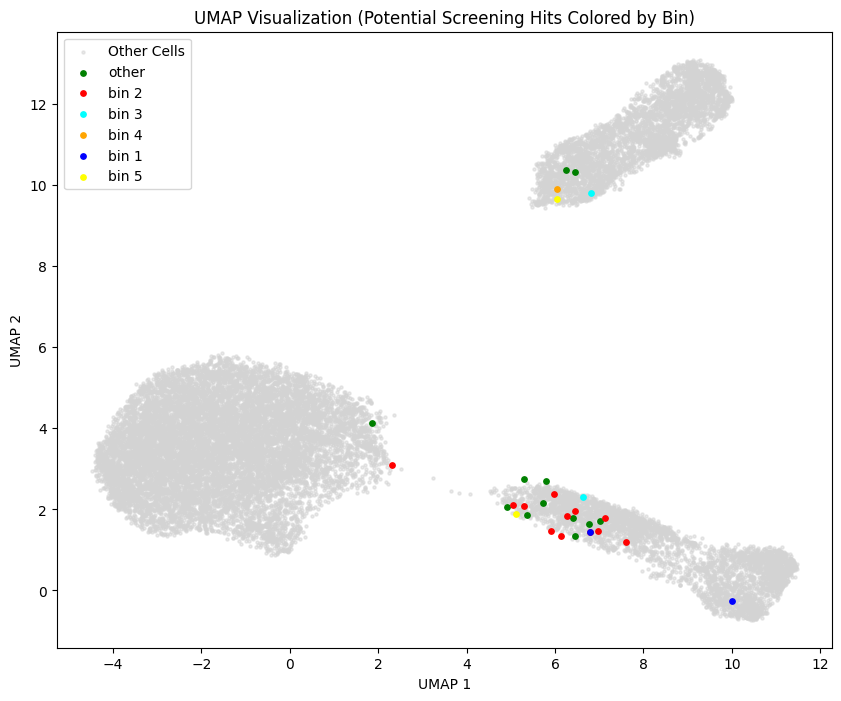

In [20]:
# Extract indices of highlighted screening cells
cell_ids_array = cell_ids_list.astype(str)  # Convert all cell IDs to string
highlighted_indices = np.isin(cell_ids_array, filtered_df["Cell ID"].values)  # Boolean mask

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Merge UMAP results with bin information
highlighted_bins = filtered_df.set_index("Cell ID").loc[cell_ids_array[highlighted_indices], "Bin"].values

# Define colors for bins
bin_colors = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black", 
    "other": "green"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot all cells in light grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='lightgrey', s=5, alpha=0.5, label="Other Cells")

# Overlay highlighted screening cells in their bin colors
for i, bin_label in enumerate(highlighted_bins):
    plt.scatter(highlighted_x[i], highlighted_y[i], color=bin_colors[bin_label], s=15, label=bin_label if bin_label not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.title('UMAP Visualization (Potential Screening Hits Colored by Bin)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)
plt.show()

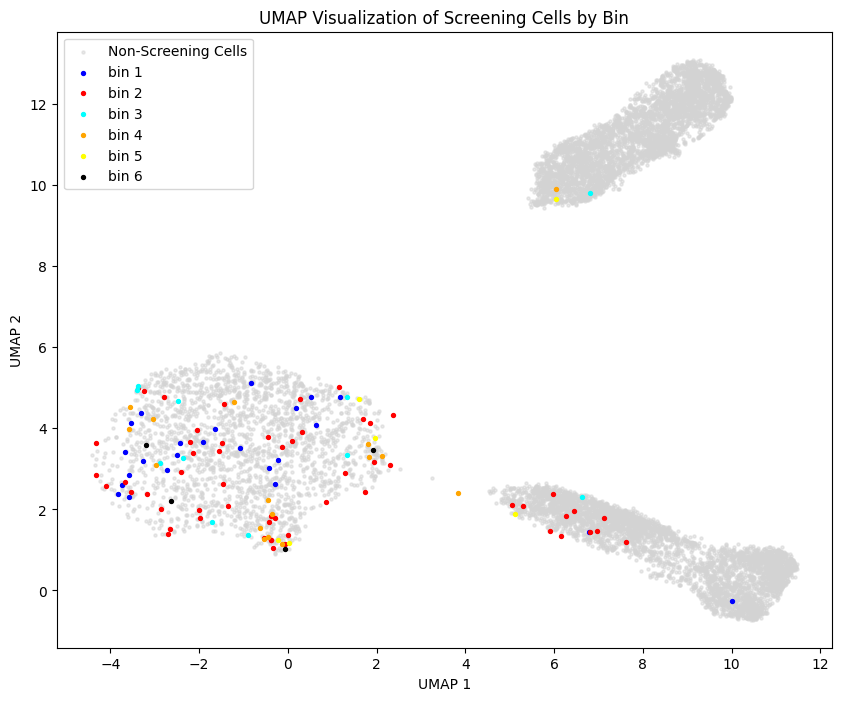

In [21]:
import os
import pickle
import numpy as np
import pandas as pd
import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mapping from Cell ID to bin values
cell_id_to_bin = dict(zip(df["Cell ID"], df["Bin"]))

# Identify screening cells
screening_idx = labels_list == 5
screening_cell_ids = [str(cell_id) for cell_id in cell_ids_list[screening_idx]]

# Extract bin values for screening cells
screening_bins = [cell_id_to_bin.get(cid, "Unknown") for cid in screening_cell_ids]

# Define a color palette for bins
bin_palette = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot non-screening cells in grey
non_screening_idx = ~screening_idx
plt.scatter(umap_result[non_screening_idx, 0], umap_result[non_screening_idx, 1],
            color='lightgrey', alpha=0.5, s=5, label="Non-Screening Cells")

# Plot screening cells with bin colors
for bin_label, color in bin_palette.items():
    bin_indices = [i for i, b in enumerate(screening_bins) if b == bin_label]
    if bin_indices:
        plt.scatter(umap_result[screening_idx][bin_indices, 0], 
                    umap_result[screening_idx][bin_indices, 1],
                    color=color, s=8, label=bin_label)

plt.legend()
plt.title("UMAP Visualization of Screening Cells by Bin")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(False)

# Save the plot
output_path = "./convnext_output_files/case1_100000_cells_umap_plot_screening_cells_by_bin.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

In [18]:
# Training data is MPCDF screening data with bin information and the dir labels are the bins!
MPCDF_screening_testdata = HDF5SingleCellDataset(
    dir_list=['/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_1/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_2/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_3/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_4/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_5/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_6/single_cells_subsetted.h5'
    ],
    dir_labels=[0, 1, 2, 3, 4, 5],  # Bin labels
    root_dir='/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/',
    select_channel=4,  # Select the 5th channel
    return_id=True
)

Total: 60000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000


In [19]:
test_loader = DataLoader(MPCDF_screening_testdata, batch_size=64, shuffle=True, num_workers=8)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [20]:
def convert_to_rgb(inputs):
    # Convert to (batch_size, 3, height, width) by repeating the channel 3 times
    return inputs.repeat(1, 3, 1, 1) 

In [21]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  
        
# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [22]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

# Define new class labels 
class_labels = ["Bin 1", "Bin 2", "Bin 3", "Bin 4", "Bin 5", "Bin 6"]


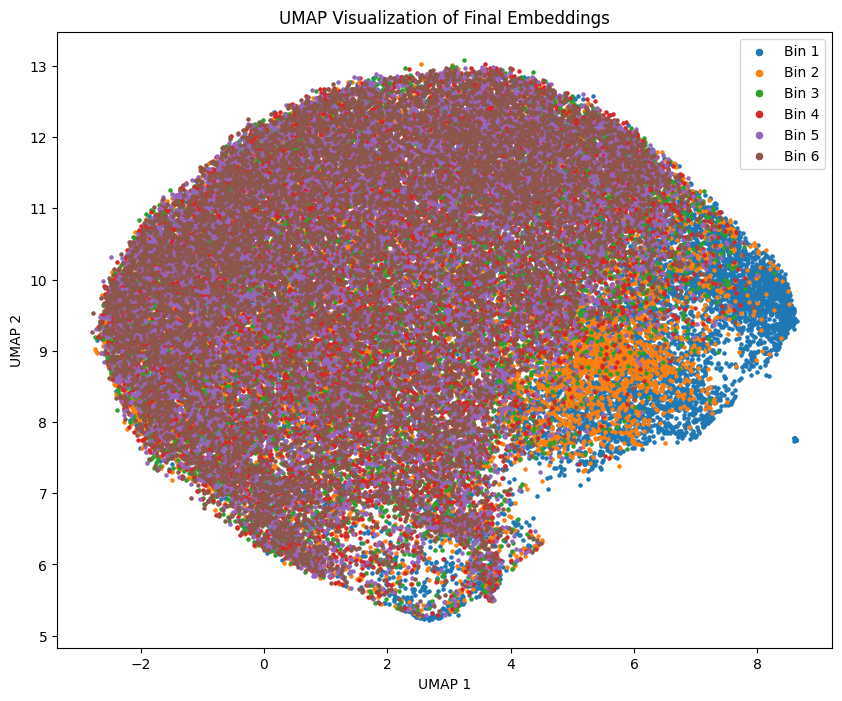

In [23]:
plt.figure(figsize=(10, 8))

labels_list = labels_list - 1

for i, label in enumerate(class_labels):
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend(markerscale=2)  # Makes legend dots larger
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

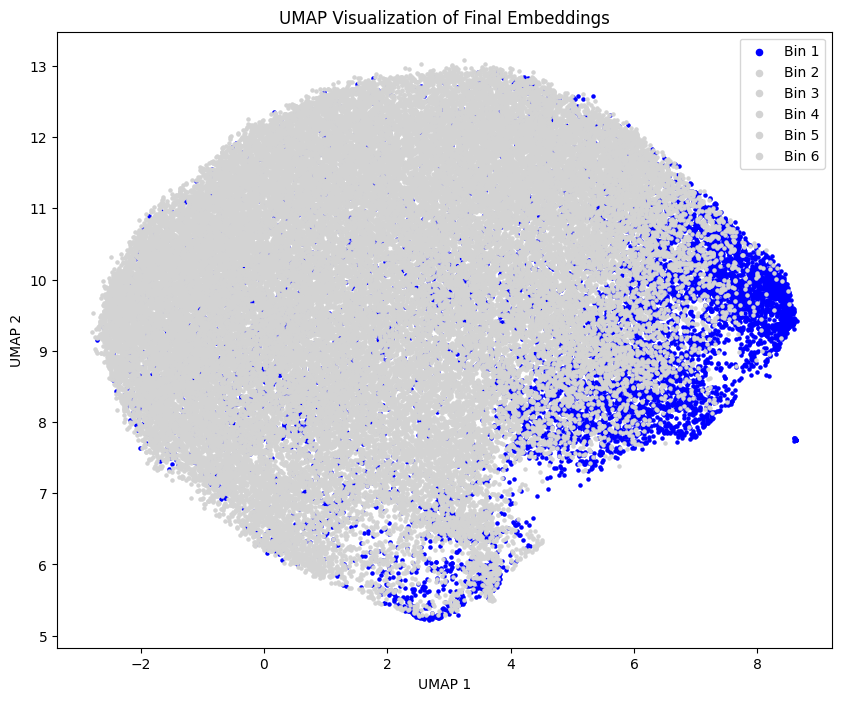

In [25]:
plt.figure(figsize=(10, 8))

for i, label in enumerate(class_labels):
    idx = labels_list == i
    color = 'blue' if i == 0 else 'lightgrey'
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5, color=color)

plt.legend(markerscale=2)
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [37]:
import numpy as np
print("Label distribution:", np.unique(labels_list, return_counts=True))

Label distribution: (array([1, 2, 3, 4, 5, 6]), array([10000, 10000, 10000, 10000, 10000, 10000]))


In [38]:
print("Total samples loaded:", len(MPCDF_screening_testdata))

Total samples loaded: 60000


In [39]:
for i, batch in enumerate(test_loader):
    _, labels, _ = batch
    print(f"Batch {i} labels:", labels.unique())
    if i == 5:
        break

Batch 0 labels: tensor([0, 1, 2, 3, 4, 5])
Batch 1 labels: tensor([0, 1, 2, 3, 4, 5])
Batch 2 labels: tensor([0, 1, 2, 3, 4, 5])
Batch 3 labels: tensor([0, 1, 2, 3, 4, 5])
Batch 4 labels: tensor([0, 1, 2, 3, 4, 5])
Batch 5 labels: tensor([0, 1, 2, 3, 4, 5])


In [40]:
bin1_mask = labels_list == 0
print("Bin 1 count:", bin1_mask.sum())

if bin1_mask.sum() > 0:
    plt.scatter(umap_result[bin1_mask, 0], umap_result[bin1_mask, 1], color='blue', s=5)
    plt.title("Only Bin 1 cells")
    plt.show()
else:
    print("No Bin 1 cells found in the data!")


Bin 1 count: 0
No Bin 1 cells found in the data!


In [43]:
# Check the minimum and maximum values in labels_list
print("Labels List Range:", np.min(labels_list), np.max(labels_list))

Labels List Range: 1 6


#### Case 2 [0,1,2 | balanced testset]

In [60]:
train_class_labels = [0, 1, 2] 

In [62]:
# Load the trainset_indices from the file
with open('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case2_balanced_trainingset_small/trainset_indices.pkl', 'rb') as f:
    trainset_indices = pickle.load(f)

In [36]:
# Load data: Balanced trainset for classes 0, 1 and 2
train_class_labels = [0, 1, 2]
balanced_trainset_class_0_and_1_and_2= HDF5SingleCellDataset(
    dir_list=[
        f'/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case2_balanced_trainingset_small/trainset_{label}.h5'
        for label in train_class_labels
    ],
    dir_labels=train_class_labels,  # Class labels
    root_dir='/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/training_sets/case2_balanced_trainingset_small/',
    select_channel=4,  # Select the 5th channel
    return_id=False
)
train_loader = DataLoader(balanced_trainset_class_0_and_1_and_2, batch_size=64, shuffle=True, num_workers=8)

Total: 3000
0: 1000
1: 1000
2: 1000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [26]:
# Define the directory and filename
save_dir = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
model_filename = "model_case_2_1000_instances.pth"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, model_filename)

In [27]:
# Load the saved model
model.load_state_dict(torch.load(model_path))
model.to(device)

ConvNextWithCustomFC(
  (embeddings): ConvNextEmbeddings(
    (patch_embeddings): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
    (layernorm): ConvNextLayerNorm()
  )
  (encoder): ConvNextEncoder(
    (stages): ModuleList(
      (0): ConvNextStage(
        (downsampling_layer): Identity()
        (layers): Sequential(
          (0): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
            (act): GELUActivation()
            (pwconv2): Linear(in_features=1024, out_features=256, bias=True)
            (drop_path): Identity()
          )
          (1): ConvNextLayer(
            (dwconv): Conv2d(256, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=256)
            (layernorm): ConvNextLayerNorm()
            (pwconv1): Linear(in_features=256, out_features=1024, bias=True)
     

In [28]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  

# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [40]:
import pickle
import os

# Define the save path
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_2_1000_instances_big.pkl"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save embeddings, labels, and cell_ids using pickle
with open(os.path.join(save_path, file_name), 'wb') as f:
    pickle.dump({'embeddings': embeddings, 'labels': labels_list, 'cell_ids': cell_ids_list}, f)

print(f"Saved embeddings, labels, and cell_ids to {os.path.join(save_path, file_name)}")

Saved embeddings, labels, and cell_ids to /dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/case_2_1000_instances_big.pkl


In [26]:
import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_2_1000_instances_big.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

Loaded embeddings shape: (20000, 2048)
Loaded labels shape: (20000,)
Loaded cell_ids shape: (20000,)


In [27]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

# UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

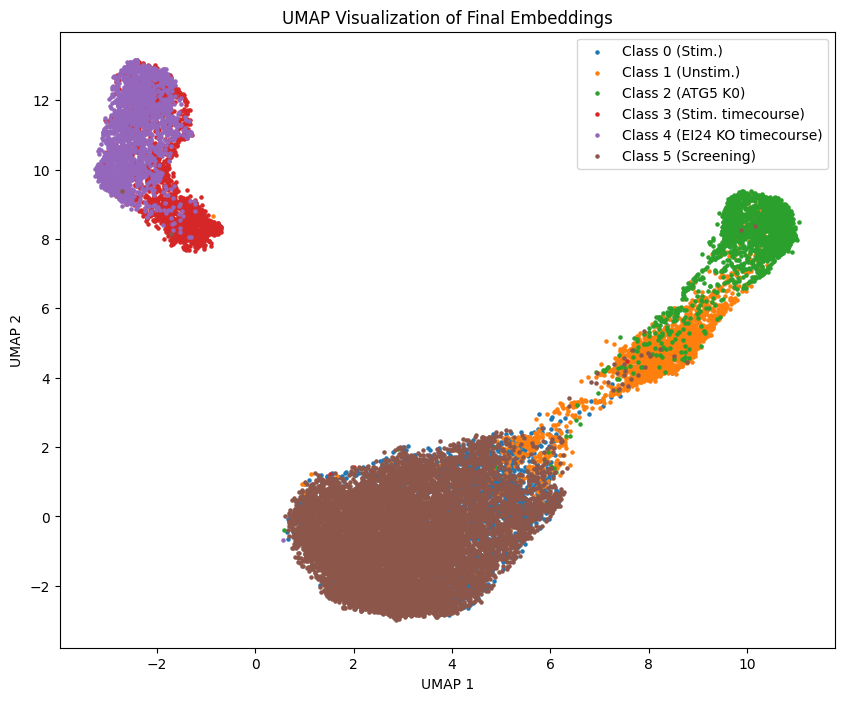

In [28]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Visualize UMAP
plt.figure(figsize=(10, 8))

for i, label in enumerate(class_labels):
    # Select indices for each class
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend()
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

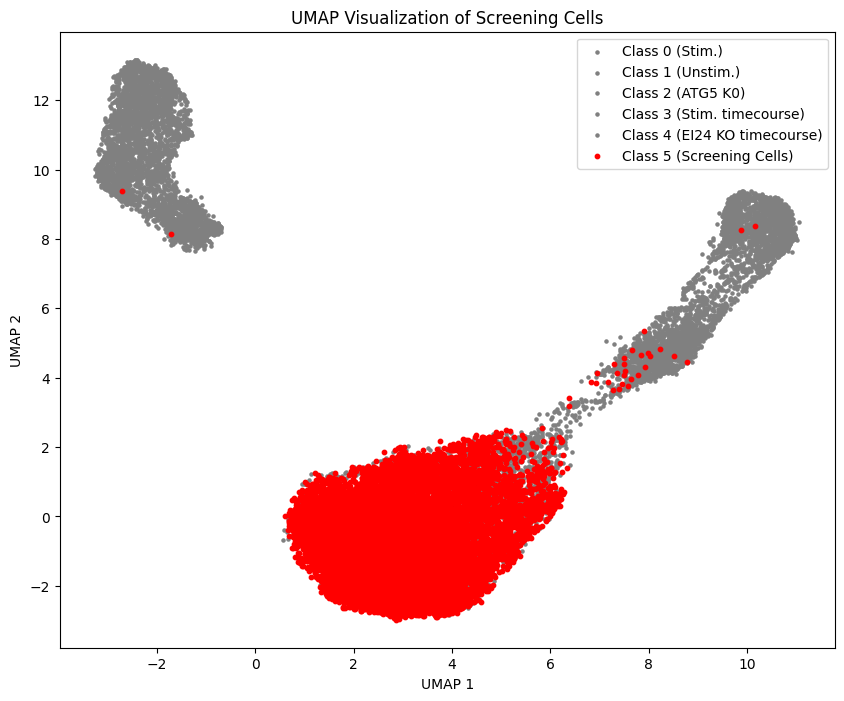

In [29]:
class_labels = ["Class 0 (Stim.)", "Class 1 (Unstim.)", "Class 2 (ATG5 K0)", "Class 3 (Stim. timecourse)", 
                "Class 4 (EI24 KO timecourse)", "Class 5 (Screening)"]

# Plotting UMAP only for Screening cells
plt.figure(figsize=(10, 8))

# Plot cells belonging to other classes in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude the last class (screening)
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', label=label, s=5)

# Plot cells belonging to class 5 (screening) with red color
screening_idx = labels_list == 5
plt.scatter(umap_result[screening_idx, 0], umap_result[screening_idx, 1], color='red', label='Class 5 (Screening Cells)', s=10)
plt.legend()
plt.title('UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [31]:
# Apply the cutoff filters on the UMAP results
x_coords = umap_result[:, 0]  # UMAP X-coordinates
y_coords = umap_result[:, 1]  # UMAP Y-coordinates

# Identify screening cells (Class 5)
screening_idx = labels_list == 5

# Select all screening cells (Class 5) that are **outside** the restricted region
filtered_idx = screening_idx & ~((y_coords <= 3))

# Extract filtered cell IDs
filtered_cell_ids = cell_ids_list[filtered_idx]

# Save the filtered cell IDs to a file
save_path = "./convnext_output_files/case2_1000_cells_outside_block_screening_hits_big.txt"
np.savetxt(save_path, filtered_cell_ids, fmt="%d")

print(f"Saved {len(filtered_cell_ids)} cell IDs to {save_path}")

Saved 31 cell IDs to ./convnext_output_files/case2_1000_cells_outside_block_screening_hits_big.txt


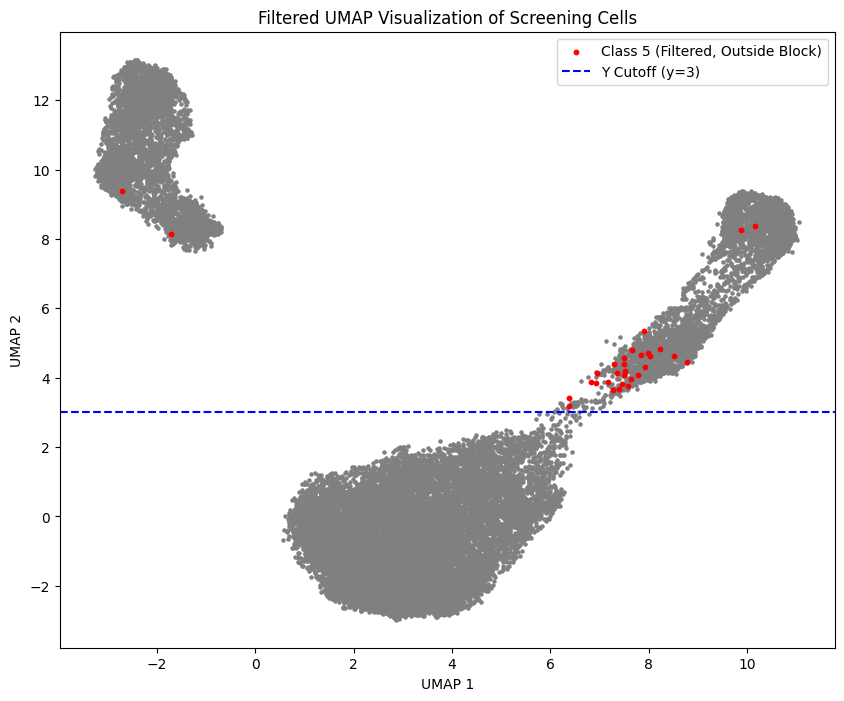

In [33]:
# Plot UMAP with Updated Cutoff
plt.figure(figsize=(10, 8))

# Plot all other classes (0-4) in grey
for i, label in enumerate(class_labels[:-1]):  # Exclude class 5
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], color='grey', s=5)

# Get all screening cell indices (class 5)
screening_idx = labels_list == 5

# Plot non-filtered screening cells in grey
non_filtered_screening_idx = screening_idx & ~filtered_idx
plt.scatter(umap_result[non_filtered_screening_idx, 0], umap_result[non_filtered_screening_idx, 1],
            color='grey', s=5)

# Plot filtered screening cells (outside block) in red
plt.scatter(x_coords[filtered_idx], y_coords[filtered_idx],
            color='red', label='Class 5 (Filtered, Outside Block)', s=10)

# Draw Y cutoff line
plt.axhline(y=3, color='blue', linestyle='--', label='Y Cutoff (y=3)')

plt.legend()
plt.title('Filtered UMAP Visualization of Screening Cells')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [37]:
import numpy as np
import pandas as pd
import umap
import umap.umap_ as umap  # Correct way
import matplotlib.pyplot as plt

# Define binning function based on autophagy_off score
def assign_bin(score):
    if score > 0.99999:
        return "bin 1"
    elif score > 0.999:
        return "bin 2"
    elif score > 0.9975:
        return "bin 3"
    elif score > 0.995:
        return "bin 4"
    elif score > 0.99:
        return "bin 5"
    elif score > 0.98:
        return "bin 6"
    else:
        return "other"

    
# Step 2: Apply binning function to create a new column
df = pd.read_csv("autophagy21_classification_scores_big_testset.csv")
df

cell_ids_to_find = ["143864", "344051", "58449", "444025", "49425", "500807", 
               "451082", "496974", "390902", "474801", "441961", "474071", 
               "55730", "336884", "149351", "441400", "445937", "322883", 
               "127065", "349419", "411852", "412462", "337264", "387731", 
               "376725", "383566", "435097", "240471", "377654", "496681", 
               "138348", "465136", "494847", "376649", "379006", "172441"]


# Apply binning function to the dataframe
df["Bin"] = df["Autophagy Off Score"].apply(assign_bin)
df["Cell ID"] = df["Cell ID"].astype(str)
df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
0         439        6.700127e-02         9.329987e-01  other
1      293873        5.018042e-07         9.999995e-01  bin 1
2        1437        7.523392e-01         2.476609e-01  other
3      437630        1.878466e-06         9.999981e-01  bin 1
4       80815        9.999956e-01         4.432396e-06  other
...       ...                 ...                  ...    ...
11995  469873        9.998048e-01         1.952647e-04  other
11996  316062        3.255916e-05         9.999675e-01  bin 2
11997  179090        9.619690e-01         3.803107e-02  other
11998  247275        2.832826e-06         9.999971e-01  bin 1
11999  104042        9.999999e-01         7.556392e-08  other

[12000 rows x 4 columns]

In [38]:
# Merge bin information into filtered_df
filtered_df = df[df["Cell ID"].isin(cell_ids_to_find)]
filtered_df

Cell ID  Autophagy On Score  Autophagy Off Score    Bin
1218  322883        6.764363e-04             0.999324  bin 2
1938  390902        9.998290e-01             0.000171  other
2076  451082        3.741750e-05             0.999963  bin 2
3355  444025        1.603911e-05             0.999984  bin 2
3417  465136        5.560375e-03             0.994440  bin 5
3517  441961        9.963536e-01             0.003646  other
3571  435097        2.896643e-03             0.997103  bin 4
6167  445937        5.950180e-05             0.999941  bin 2
6329  441400        2.105678e-04             0.999789  bin 2
6596  412462        4.086442e-04             0.999591  bin 2
7681  474071        5.001426e-05             0.999950  bin 2
7750  496681        5.460521e-04             0.999454  bin 2
8024  240471        1.128008e-04             0.999887  bin 2
8773  387731        1.704567e-04             0.999830  bin 2
8925  127065        6.567348e-07             0.999999  bin 1
9424  344051        8.049860e-03             0.991950  bin 5
9590  337264        1.093504e-03             0.998907  bin 3
9981   49425        6.830680e-03             0.993169  bin 5

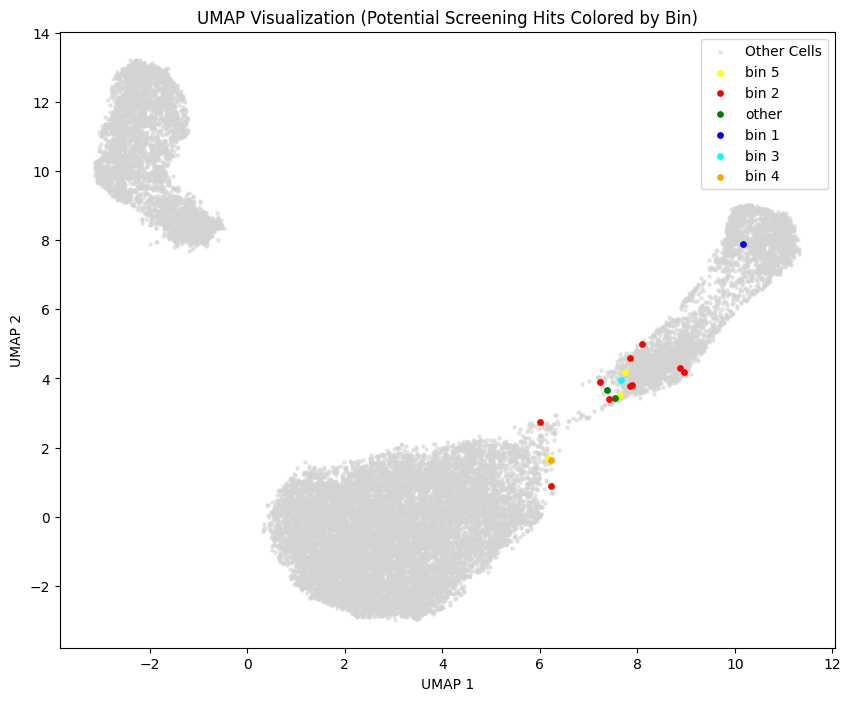

In [39]:
# Extract indices of highlighted screening cells
cell_ids_array = cell_ids_list.astype(str)  # Convert all cell IDs to string
highlighted_indices = np.isin(cell_ids_array, filtered_df["Cell ID"].values)  # Boolean mask

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Merge UMAP results with bin information
highlighted_bins = filtered_df.set_index("Cell ID").loc[cell_ids_array[highlighted_indices], "Bin"].values

# Define colors for bins
bin_colors = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black", 
    "other": "green"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot all cells in light grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='lightgrey', s=5, alpha=0.5, label="Other Cells")

# Overlay highlighted screening cells in their bin colors
for i, bin_label in enumerate(highlighted_bins):
    plt.scatter(highlighted_x[i], highlighted_y[i], color=bin_colors[bin_label], s=15, label=bin_label if bin_label not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.title('UMAP Visualization (Potential Screening Hits Colored by Bin)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)
plt.show()

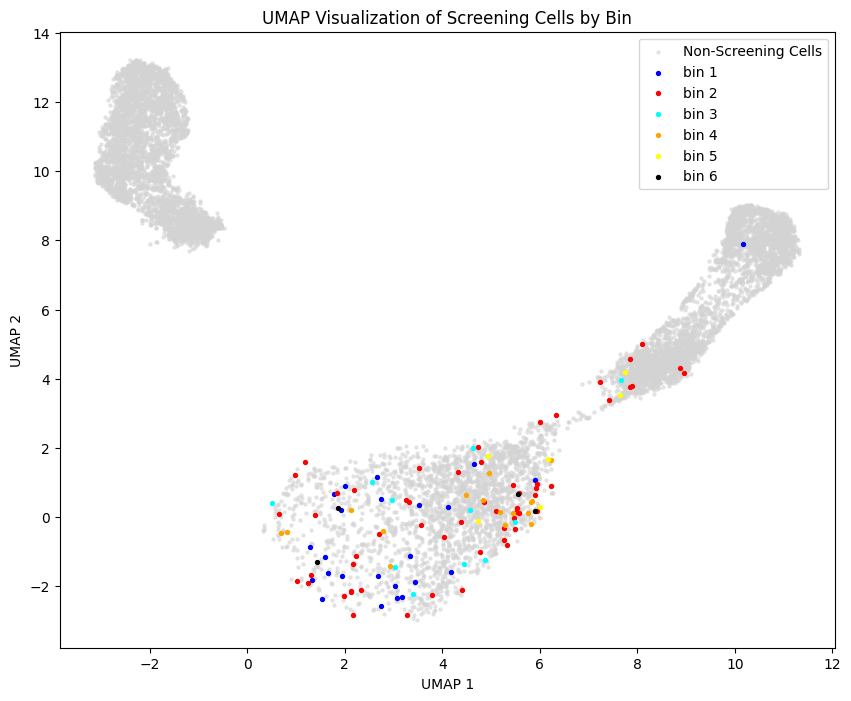

In [40]:
import os
import pickle
import numpy as np
import pandas as pd
import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mapping from Cell ID to bin values
cell_id_to_bin = dict(zip(df["Cell ID"], df["Bin"]))

# Identify screening cells
screening_idx = labels_list == 5
screening_cell_ids = [str(cell_id) for cell_id in cell_ids_list[screening_idx]]

# Extract bin values for screening cells
screening_bins = [cell_id_to_bin.get(cid, "Unknown") for cid in screening_cell_ids]

# Define a color palette for bins
bin_palette = {
    "bin 1": "blue",
    "bin 2": "red",
    "bin 3": "cyan",
    "bin 4": "orange",
    "bin 5": "yellow",
    "bin 6": "black"
}

# Plot UMAP
plt.figure(figsize=(10, 8))

# Plot non-screening cells in grey
non_screening_idx = ~screening_idx
plt.scatter(umap_result[non_screening_idx, 0], umap_result[non_screening_idx, 1],
            color='lightgrey', alpha=0.5, s=5, label="Non-Screening Cells")

# Plot screening cells with bin colors
for bin_label, color in bin_palette.items():
    bin_indices = [i for i, b in enumerate(screening_bins) if b == bin_label]
    if bin_indices:
        plt.scatter(umap_result[screening_idx][bin_indices, 0], 
                    umap_result[screening_idx][bin_indices, 1],
                    color=color, s=8, label=bin_label)

plt.legend()
plt.title("UMAP Visualization of Screening Cells by Bin")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(False)

# Save the plot
output_path = "./convnext_output_files/case2_1000_cells_umap_plot_screening_cells_by_bin.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Training data is MPCDF screening data with bin information and the dir labels are the bins!
MPCDF_screening_testdata = HDF5SingleCellDataset(
    dir_list=['/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_1/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_2/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_3/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_4/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_5/single_cells_subsetted.h5',
              '/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/bin_6/single_cells_subsetted.h5'
    ],
    dir_labels=[1, 2, 3, 4, 5, 6],  # Bin labels
    root_dir='/dss/dsshome1/0F/di93quv/MPCDF_data/Screen_2.3/',
    select_channel=4,  # Select the 5th channel
    return_id=True
)

Total: 60000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000


In [30]:
test_data_loader = DataLoader(MPCDF_screening_testdata, batch_size=64, shuffle=True, num_workers=8)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [31]:
def convert_to_rgb(inputs):
    # Convert to (batch_size, 3, height, width) by repeating the channel 3 times
    return inputs.repeat(1, 3, 1, 1) 

In [32]:
embeddings = []
labels_list = []
cell_ids_list = []  

model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        inputs, labels, cell_ids = batch  
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Convert inputs from single-channel to 3 channels
        inputs = convert_to_rgb(inputs)

        # Forward pass to get logits and pooler output
        _, pooler_output = model(inputs)

        # Append pooler_output, labels, and cell_ids
        embeddings.append(pooler_output.cpu().detach().numpy())
        labels_list.append(labels.cpu().detach().numpy())
        cell_ids_list.append(cell_ids.cpu().detach().numpy())  

# Convert to numpy arrays
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)
cell_ids_list = np.concatenate(cell_ids_list, axis=0) 

In [33]:
# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)

# Define new class labels 
class_labels = ["Bin 1", "Bin 2", "Bin 3", "Bin 4", "Bin 5", "Bin 6"]

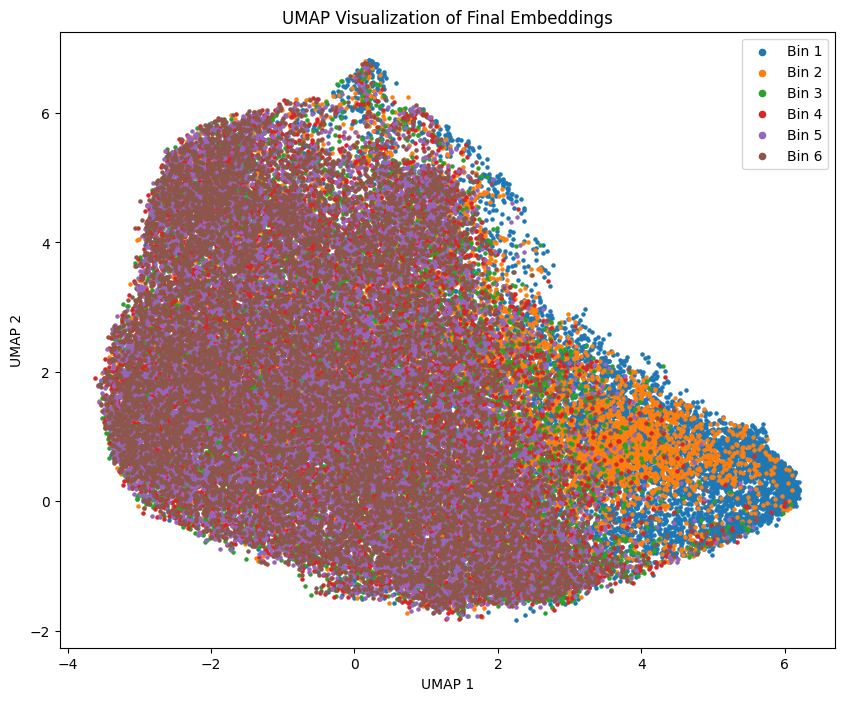

In [34]:
plt.figure(figsize=(10, 8))

labels_list = labels_list - 1

for i, label in enumerate(class_labels):
    idx = labels_list == i
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=label, s=5)

plt.legend(markerscale=2)  # Makes legend dots larger
plt.title('UMAP Visualization of Final Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

## Check for overlapping screening hit cell IDs and visualize the images for those cells

In [49]:
# Print the number of saved cell IDs per file
file_paths = {
    "ConvNeXt case 1 - 1000 cells": "./convnext_output_files/case1_1000_cells_outside_block_screening_hits_big_testset.txt",
    "ConvNeXt case 1 - 100000 cells": "./convnext_output_files/case1_100000_cells_outside_block_screening_hits_big.txt",
    "ConvNeXt case 2 - 1000 cells": "./convnext_output_files/case2_1000_cells_outside_block_screening_hits_big.txt",
    "De novo case 1 - 100000 cells": "./de_novo_output_files/de_novo_outside_block_screening_hits_big.txt"  
}

# Load cell IDs from files
cell_id_sets = {key: set(np.loadtxt(path, dtype=int)) for key, path in file_paths.items()}

print("Cell ID counts per file:")
for key, cell_ids in cell_id_sets.items():
    print(f"{key}: {len(cell_ids)} cell IDs")

Cell ID counts per file:
ConvNeXt case 1 - 1000 cells: 92 cell IDs
ConvNeXt case 1 - 100000 cells: 50 cell IDs
ConvNeXt case 2 - 1000 cells: 31 cell IDs
De novo case 1 - 100000 cells: 80 cell IDs


In [50]:
# Find overlapping cell IDs across all four sets
overlapping_all = set.intersection(*cell_id_sets.values())

# Find pairwise overlaps
overlap_case1_1000_de_novo = cell_id_sets["ConvNeXt case 1 - 1000 cells"] & cell_id_sets["De novo case 1 - 100000 cells"]
overlap_case1_100000_de_novo = cell_id_sets["ConvNeXt case 1 - 100000 cells"] & cell_id_sets["De novo case 1 - 100000 cells"]
overlap_case2_1000_de_novo = cell_id_sets["ConvNeXt case 2 - 1000 cells"] & cell_id_sets["De novo case 1 - 100000 cells"]

# Print overlaps
print(f"\nTotal Overlapping Cell IDs in ALL SETS: {len(overlapping_all)}")
print(f"Case 1 (1000 cells) & De Novo: {len(overlap_case1_1000_de_novo)}")
print(f"Case 1 (100000 cells) & De Novo: {len(overlap_case1_100000_de_novo)}")
print(f"Case 2 (1000 cells) & De Novo: {len(overlap_case2_1000_de_novo)}")


Total Overlapping Cell IDs in ALL SETS: 4
Case 1 (1000 cells) & De Novo: 21
Case 1 (100000 cells) & De Novo: 18
Case 2 (1000 cells) & De Novo: 14


a) First let us plot the overlapping cell ID images for all 3 ConvNeXt runs alone:

In [51]:
def visualize_and_save_cells(overlapping_cell_ids, data_loader, save_path="./convnext_output_files/overlapping_cell_images_big_testset.png"):
    """Visualizes images for the overlapping cell IDs in a dynamic grid, saves, and shows the result."""
    if not overlapping_cell_ids:
        print("No overlapping cell images to visualize.")
        return

    overlapping_cell_ids = list(overlapping_cell_ids)
    num_images = len(overlapping_cell_ids)
    
    # Dynamically determine grid size (rows, cols) to fit all images
    grid_cols = 10 
    grid_rows = int(np.ceil(num_images / grid_cols))  
    
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 1.5 * grid_rows))

    image_count = 0
    for images, labels, cell_ids in data_loader:
        for i in range(len(cell_ids)):
            if cell_ids[i].item() in overlapping_cell_ids:
                row, col = divmod(image_count, grid_cols)
                ax = axes[row, col] if grid_rows > 1 else axes[col]

                image_data = images[i].numpy()
                num_channels = image_data.shape[0]

                # If single-channel, show grayscale image
                if num_channels == 1:
                    ax.imshow(image_data[0], cmap='viridis')
                else:
                    ax.imshow(np.moveaxis(image_data, 0, -1))  # Reorder channels!!

                ax.set_title(f"ID: {cell_ids[i].item()}", fontsize=8)
                ax.axis("off")

                image_count += 1
                if image_count >= num_images:  
                    break  

        if image_count >= num_images:
            break  

    # Hide unused subplots
    for ax in axes.flat[image_count:]:
        ax.axis("off")

    plt.tight_layout()
    plt.title(f"Overlapping Cell Images ({num_images} total)", fontsize=10)
    
    # Save 
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300)
    print(f"Saved overlapping cell images to {save_path}")
    plt.show()

Saved overlapping cell images to ./convnext_output_files/overlapping_cell_images_big_testset.png


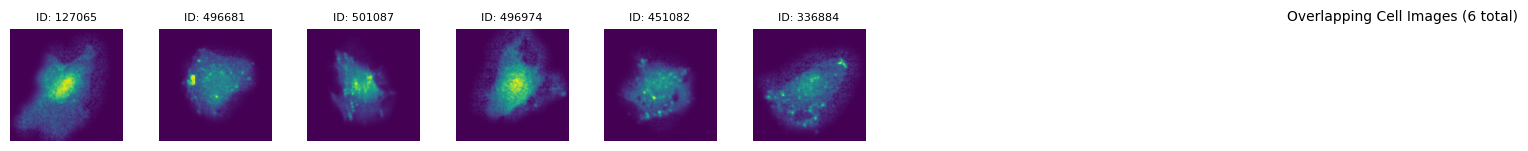

In [52]:
# Find overlapping cell IDs among the three ConvNeXt runs
overlapping_convnext = (
    cell_id_sets["ConvNeXt case 1 - 1000 cells"] & 
    cell_id_sets["ConvNeXt case 1 - 100000 cells"] & 
    cell_id_sets["ConvNeXt case 2 - 1000 cells"]
)

# Ensure it's not empty
if overlapping_convnext:
    visualize_and_save_cells(overlapping_convnext, test_data_loader)
else:
    print("No overlapping cell images found among the three ConvNeXt runs.")


Plot in UMAP where the 5 overlapping cells across all 3 ConvNeXt runs are located:

#### Run 1: ConvNext case 1 - 1000 cells

In [69]:
"""import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_1000_instances_big.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)"""

'import pickle\nimport os\n\n# Define the save path and file name\nsave_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"\nfile_name = "case_1_1000_instances_big.pkl"\nfile_path = os.path.join(save_path, file_name)\n\n# Load the data\nwith open(file_path, \'rb\') as f:\n    data = pickle.load(f)\n\n# Extract embeddings, labels, and cell_ids\nembeddings = data[\'embeddings\']\nlabels_list = data[\'labels\']\ncell_ids_list = data[\'cell_ids\']\n\nprint(f"Loaded embeddings shape: {embeddings.shape}")\nprint(f"Loaded labels shape: {labels_list.shape}")\nprint(f"Loaded cell_ids shape: {cell_ids_list.shape}")\n\n# Flatten the embeddings to shape [samples, features]\nembeddings_flat = embeddings.reshape(embeddings.shape[0], -1)\n\n#UMAP\numap_reducer = umap.UMAP(n_components=2)\numap_result = umap_reducer.fit_transform(embeddings_flat)'

In [68]:
"""# Define the cell IDs to highlight
highlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])

# Find indices of these Cell IDs in the dataset
highlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Plot the UMAP again with the highlighted cells
plt.figure(figsize=(10, 8))

# Plot all cells in grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='grey', label="Other Cells", s=5, alpha=0.5)

# Highlight specific cells in green with larger markers
plt.scatter(highlighted_x, highlighted_y, color='red', edgecolors='red', s=10, label='Highlighted Cells', marker='o')

# Add labels to each highlighted point
for i, txt in enumerate(highlighted_cell_ids):
    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color='black', xytext=(5,5), textcoords='offset points')

# Legend and formatting
plt.legend()
plt.title('UMAP Visualization Showing Overlapping Screening Hits (ConvNeXt run 1 - 1000 cells)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()"""

'# Define the cell IDs to highlight\nhighlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])\n\n# Find indices of these Cell IDs in the dataset\nhighlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)\n\n# Extract UMAP coordinates of these highlighted cells\nhighlighted_x = umap_result[highlighted_indices, 0]\nhighlighted_y = umap_result[highlighted_indices, 1]\n\n# Plot the UMAP again with the highlighted cells\nplt.figure(figsize=(10, 8))\n\n# Plot all cells in grey\nplt.scatter(umap_result[:, 0], umap_result[:, 1], color=\'grey\', label="Other Cells", s=5, alpha=0.5)\n\n# Highlight specific cells in green with larger markers\nplt.scatter(highlighted_x, highlighted_y, color=\'red\', edgecolors=\'red\', s=10, label=\'Highlighted Cells\', marker=\'o\')\n\n# Add labels to each highlighted point\nfor i, txt in enumerate(highlighted_cell_ids):\n    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color=\'black\', xytext=(5,5), textcoords=\'of

#### Run 2: ConvNext case 1 - 100000 cells

In [67]:
"""import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_1_100000_instances.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)"""

'import pickle\nimport os\n\n# Define the save path and file name\nsave_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"\nfile_name = "case_1_100000_instances.pkl"\nfile_path = os.path.join(save_path, file_name)\n\n# Load the data\nwith open(file_path, \'rb\') as f:\n    data = pickle.load(f)\n\n# Extract embeddings, labels, and cell_ids\nembeddings = data[\'embeddings\']\nlabels_list = data[\'labels\']\ncell_ids_list = data[\'cell_ids\']\n\nprint(f"Loaded embeddings shape: {embeddings.shape}")\nprint(f"Loaded labels shape: {labels_list.shape}")\nprint(f"Loaded cell_ids shape: {cell_ids_list.shape}")\n\n# Flatten the embeddings to shape [samples, features]\nembeddings_flat = embeddings.reshape(embeddings.shape[0], -1)\n\n#UMAP\numap_reducer = umap.UMAP(n_components=2)\numap_result = umap_reducer.fit_transform(embeddings_flat)'

In [66]:
"""# Define the cell IDs to highlight
highlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])

# Find indices of these Cell IDs in the dataset
highlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Plot the UMAP again with the highlighted cells
plt.figure(figsize=(10, 8))

# Plot all cells in grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='grey', label="Other Cells", s=5, alpha=0.5)

# Highlight specific cells in green with larger markers
plt.scatter(highlighted_x, highlighted_y, color='red', edgecolors='red', s=10, label='Highlighted Cells', marker='o')

# Add labels to each highlighted point
for i, txt in enumerate(highlighted_cell_ids):
    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color='black', xytext=(5,5), textcoords='offset points')

# Legend and formatting
plt.legend()
plt.title('UMAP Visualization Showing Overlapping Screening Hits (ConvNeXt run 2 - 100000 cells)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()"""

'# Define the cell IDs to highlight\nhighlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])\n\n# Find indices of these Cell IDs in the dataset\nhighlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)\n\n# Extract UMAP coordinates of these highlighted cells\nhighlighted_x = umap_result[highlighted_indices, 0]\nhighlighted_y = umap_result[highlighted_indices, 1]\n\n# Plot the UMAP again with the highlighted cells\nplt.figure(figsize=(10, 8))\n\n# Plot all cells in grey\nplt.scatter(umap_result[:, 0], umap_result[:, 1], color=\'grey\', label="Other Cells", s=5, alpha=0.5)\n\n# Highlight specific cells in green with larger markers\nplt.scatter(highlighted_x, highlighted_y, color=\'red\', edgecolors=\'red\', s=10, label=\'Highlighted Cells\', marker=\'o\')\n\n# Add labels to each highlighted point\nfor i, txt in enumerate(highlighted_cell_ids):\n    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color=\'black\', xytext=(5,5), textcoords=\'of

#### Run 3: ConvNext case 2 - 1000 cells

In [65]:
"""import pickle
import os

# Define the save path and file name
save_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"
file_name = "case_2_1000_instances.pkl"
file_path = os.path.join(save_path, file_name)

# Load the data
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract embeddings, labels, and cell_ids
embeddings = data['embeddings']
labels_list = data['labels']
cell_ids_list = data['cell_ids']

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels_list.shape}")
print(f"Loaded cell_ids shape: {cell_ids_list.shape}")

# Flatten the embeddings to shape [samples, features]
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

#UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(embeddings_flat)"""

'import pickle\nimport os\n\n# Define the save path and file name\nsave_path = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93quv/convnext/"\nfile_name = "case_2_1000_instances.pkl"\nfile_path = os.path.join(save_path, file_name)\n\n# Load the data\nwith open(file_path, \'rb\') as f:\n    data = pickle.load(f)\n\n# Extract embeddings, labels, and cell_ids\nembeddings = data[\'embeddings\']\nlabels_list = data[\'labels\']\ncell_ids_list = data[\'cell_ids\']\n\nprint(f"Loaded embeddings shape: {embeddings.shape}")\nprint(f"Loaded labels shape: {labels_list.shape}")\nprint(f"Loaded cell_ids shape: {cell_ids_list.shape}")\n\n# Flatten the embeddings to shape [samples, features]\nembeddings_flat = embeddings.reshape(embeddings.shape[0], -1)\n\n#UMAP\numap_reducer = umap.UMAP(n_components=2)\numap_result = umap_reducer.fit_transform(embeddings_flat)'

In [64]:
"""# Define the cell IDs to highlight
highlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])

# Find indices of these Cell IDs in the dataset
highlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Plot the UMAP again with the highlighted cells
plt.figure(figsize=(10, 8))

# Plot all cells in grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='grey', label="Other Cells", s=5, alpha=0.5)

# Highlight specific cells in green with larger markers
plt.scatter(highlighted_x, highlighted_y, color='red', edgecolors='red', s=10, label='Highlighted Cells', marker='o')

# Add labels to each highlighted point
for i, txt in enumerate(highlighted_cell_ids):
    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color='black', xytext=(5,5), textcoords='offset points')

# Legend and formatting
plt.legend()
plt.title('UMAP Visualization Showing Overlapping Screening Hits (ConvNeXt run 3 - 1000 cells)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()"""

'# Define the cell IDs to highlight\nhighlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405])\n\n# Find indices of these Cell IDs in the dataset\nhighlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)\n\n# Extract UMAP coordinates of these highlighted cells\nhighlighted_x = umap_result[highlighted_indices, 0]\nhighlighted_y = umap_result[highlighted_indices, 1]\n\n# Plot the UMAP again with the highlighted cells\nplt.figure(figsize=(10, 8))\n\n# Plot all cells in grey\nplt.scatter(umap_result[:, 0], umap_result[:, 1], color=\'grey\', label="Other Cells", s=5, alpha=0.5)\n\n# Highlight specific cells in green with larger markers\nplt.scatter(highlighted_x, highlighted_y, color=\'red\', edgecolors=\'red\', s=10, label=\'Highlighted Cells\', marker=\'o\')\n\n# Add labels to each highlighted point\nfor i, txt in enumerate(highlighted_cell_ids):\n    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color=\'black\', xytext=(5,5), textcoords=\'of

b) Now including the de novo results:

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt

def visualize_and_save_cells(overlapping_cell_ids, data_loader, save_path="./convnext_output_files/overlapping_cell_images.png"):
    """Visualizes images for the overlapping cell IDs in a dynamic grid, saves, and shows the result."""
    if not overlapping_cell_ids:
        print("No overlapping cell images to visualize.")
        return

    overlapping_cell_ids = list(overlapping_cell_ids)
    num_images = len(overlapping_cell_ids)
    
    # Determine grid size dynamically
    grid_cols = 10  
    grid_rows = int(np.ceil(num_images / grid_cols))  
    
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 1.5 * grid_rows))

    image_count = 0
    for images, labels, cell_ids in data_loader:
        for i in range(len(cell_ids)):
            if cell_ids[i].item() in overlapping_cell_ids:
                row, col = divmod(image_count, grid_cols)
                ax = axes[row, col] if grid_rows > 1 else axes[col]

                image_data = images[i].numpy()
                num_channels = image_data.shape[0]

                # If single-channel, show grayscale image
                if num_channels == 1:
                    ax.imshow(image_data[0], cmap='viridis')
                else:
                    ax.imshow(np.moveaxis(image_data, 0, -1))  # Convert channel order!!

                ax.set_title(f"ID: {cell_ids[i].item()}", fontsize=8)
                ax.axis("off")

                image_count += 1
                if image_count >= num_images:  
                    break  

        if image_count >= num_images:
            break  

    # Hide unused subplots
    for ax in axes.flat[image_count:]:
        ax.axis("off")

    plt.tight_layout()
    plt.title(f"Overlapping Cell Images ({num_images} total)", fontsize=10)
    
    # Save 
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300)
    print(f"Saved overlapping cell images to {save_path}")
    plt.show()

Saved overlapping cell images to ./convnext_output_files/overlapping_all_cell_images_big_tstset.png


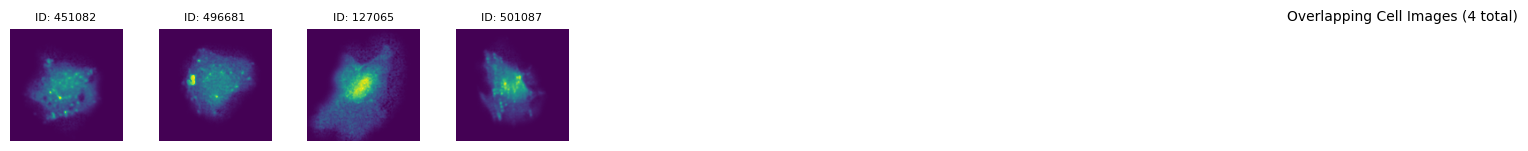

In [54]:
# Get all overlapping cell IDs across the 4 datasets
overlapping_all = set.intersection(*cell_id_sets.values())

# Visualize and save images for all overlapping cells (including De Novo)
if overlapping_all:
    visualize_and_save_cells(overlapping_all, test_data_loader, save_path="./convnext_output_files/overlapping_all_cell_images_big_tstset.png")

### Make Venn diagrams showing overlapping cell IDs visually

a) For all 3 ConvNeXt runs

b) For all 3 ConvNeXt runs + de novo model results

<Figure size 800x600 with 0 Axes>

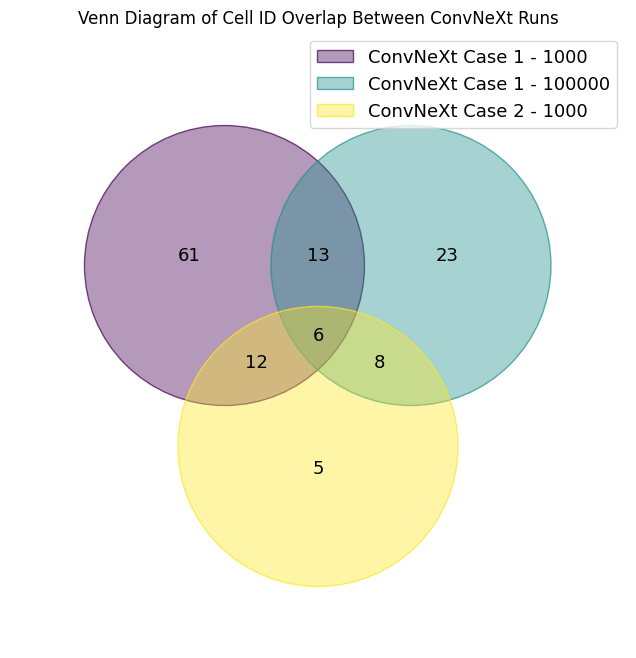

<Figure size 800x600 with 0 Axes>

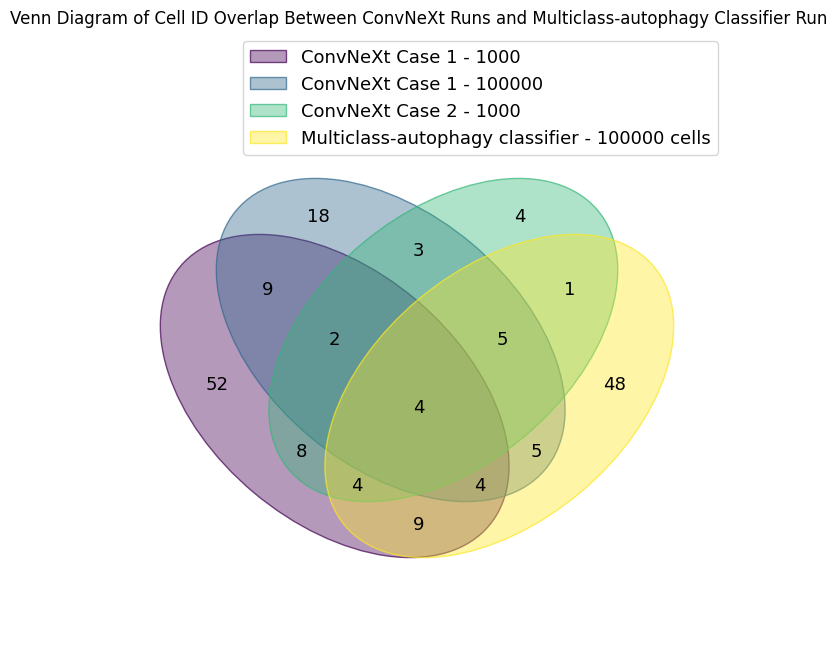

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from venn import venn

# File paths and loading cell IDs as sets
file_paths = {
    "ConvNeXt case 1 - 1000 cells": "./convnext_output_files/case1_1000_cells_outside_block_screening_hits_big_testset.txt",
    "ConvNeXt case 1 - 100000 cells": "./convnext_output_files/case1_100000_cells_outside_block_screening_hits_big.txt",
    "ConvNeXt case 2 - 1000 cells": "./convnext_output_files/case2_1000_cells_outside_block_screening_hits_big.txt",
    "De novo case 1 - 100000 cells": "./de_novo_output_files/de_novo_outside_block_screening_hits_big.txt"
}

# Load cell IDs from files
cell_id_sets = {key: set(np.loadtxt(path, dtype=int)) for key, path in file_paths.items()}

# Define sets for the ConvNeXt runs and De Novo
set_case1_1000 = cell_id_sets["ConvNeXt case 1 - 1000 cells"]
set_case1_100000 = cell_id_sets["ConvNeXt case 1 - 100000 cells"]
set_case2_1000 = cell_id_sets["ConvNeXt case 2 - 1000 cells"]
set_de_novo = cell_id_sets["De novo case 1 - 100000 cells"]

# Venn Plot 1: ConvNeXt only (3 sets)
sets_convnext = {
    "ConvNeXt Case 1 - 1000": set_case1_1000,
    "ConvNeXt Case 1 - 100000": set_case1_100000,
    "ConvNeXt Case 2 - 1000": set_case2_1000
}

# Create the Venn diagram for the 3 ConvNeXt sets
plt.figure(figsize=(8, 6))
venn(sets_convnext)

# Title and display the first Venn diagram
plt.title("Venn Diagram of Cell ID Overlap Between ConvNeXt Runs")
plt.show()

# Venn Plot 2: ConvNeXt + De Novo (4 sets)
sets_all = {
    "ConvNeXt Case 1 - 1000": set_case1_1000,
    "ConvNeXt Case 1 - 100000": set_case1_100000,
    "ConvNeXt Case 2 - 1000": set_case2_1000,
    "Multiclass-autophagy classifier - 100000 cells": set_de_novo
}

# Create the Venn diagram for the 4 sets
plt.figure(figsize=(8, 6))
venn(sets_all)

# Title and display the second Venn diagram
plt.title("Venn Diagram of Cell ID Overlap Between ConvNeXt Runs and Multiclass-autophagy Classifier Run")
plt.show()

### Plot the cell IDs from Venn diagram from ConvNeXt runs 1 and 2

We want to plot these in particular becuase we are now including the red potential screening hits in the red/purple cluster. If those overlap as well for the 2 convnext runs 1 and run 2, then it would mean we have potentially 2 different biological groups which is cool...

In [ ]:
# Find overlapping cell IDs among the ConvNeXt runs 1 and 2
overlapping_convnext = (
    cell_id_sets["ConvNeXt case 1 - 1000 cells"] & 
    cell_id_sets["ConvNeXt case 1 - 100000 cells"] 
)

# Ensure it's not empty
if overlapping_convnext:
    visualize_and_save_cells(overlapping_convnext, test_data_loader, ".convnext_output_files/overlapping_cell_images_run_1_and_2_big.png")
else:
    print("No overlapping cell images found among the three ConvNeXt runs.")

Saved overlapping cell images to .convnext_output_files/overlapping_cell_images_run_1_and_2_big.png


For ConvNext run 1, this results in:

In [61]:
"""# Define the cell IDs to highlight
highlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405, 468563, 33524])

# Find indices of these Cell IDs in the dataset
highlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Plot the UMAP again with the highlighted cells
plt.figure(figsize=(10, 8))

# Plot all cells in grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='grey', label="Other Cells", s=5, alpha=0.5)

# Highlight specific cells in green with larger markers
plt.scatter(highlighted_x, highlighted_y, color='red', edgecolors='red', s=10, label='Highlighted Cells', marker='o')

# Add labels to each highlighted point
for i, txt in enumerate(highlighted_cell_ids):
    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color='black', xytext=(5,5), textcoords='offset points')

# Legend and formatting
plt.legend()
plt.title('UMAP Visualization Showing Overlapping Screening Hits (ConvNeXt run 1 - 1000 cells)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()"""

'# Define the cell IDs to highlight\nhighlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405, 468563, 33524])\n\n# Find indices of these Cell IDs in the dataset\nhighlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)\n\n# Extract UMAP coordinates of these highlighted cells\nhighlighted_x = umap_result[highlighted_indices, 0]\nhighlighted_y = umap_result[highlighted_indices, 1]\n\n# Plot the UMAP again with the highlighted cells\nplt.figure(figsize=(10, 8))\n\n# Plot all cells in grey\nplt.scatter(umap_result[:, 0], umap_result[:, 1], color=\'grey\', label="Other Cells", s=5, alpha=0.5)\n\n# Highlight specific cells in green with larger markers\nplt.scatter(highlighted_x, highlighted_y, color=\'red\', edgecolors=\'red\', s=10, label=\'Highlighted Cells\', marker=\'o\')\n\n# Add labels to each highlighted point\nfor i, txt in enumerate(highlighted_cell_ids):\n    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color=\'black\', xytext=(5,5), 

For Convnext run 2 we get:

In [60]:
"""# Define the cell IDs to highlight
highlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405, 468563, 33524])

# Find indices of these Cell IDs in the dataset
highlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)

# Extract UMAP coordinates of these highlighted cells
highlighted_x = umap_result[highlighted_indices, 0]
highlighted_y = umap_result[highlighted_indices, 1]

# Plot the UMAP again with the highlighted cells
plt.figure(figsize=(10, 8))

# Plot all cells in grey
plt.scatter(umap_result[:, 0], umap_result[:, 1], color='grey', label="Other Cells", s=5, alpha=0.5)

# Highlight specific cells in green with larger markers
plt.scatter(highlighted_x, highlighted_y, color='red', edgecolors='red', s=10, label='Highlighted Cells', marker='o')

# Add labels to each highlighted point
for i, txt in enumerate(highlighted_cell_ids):
    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color='black', xytext=(5,5), textcoords='offset points')

# Legend and formatting
plt.legend()
plt.title('UMAP Visualization Showing Overlapping Screening Hits (ConvNeXt run 2 - 100000 cells)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()"""

'# Define the cell IDs to highlight\nhighlighted_cell_ids = np.array([16372, 495085, 499830, 226165, 257405, 468563, 33524])\n\n# Find indices of these Cell IDs in the dataset\nhighlighted_indices = np.isin(cell_ids_list, highlighted_cell_ids)\n\n# Extract UMAP coordinates of these highlighted cells\nhighlighted_x = umap_result[highlighted_indices, 0]\nhighlighted_y = umap_result[highlighted_indices, 1]\n\n# Plot the UMAP again with the highlighted cells\nplt.figure(figsize=(10, 8))\n\n# Plot all cells in grey\nplt.scatter(umap_result[:, 0], umap_result[:, 1], color=\'grey\', label="Other Cells", s=5, alpha=0.5)\n\n# Highlight specific cells in green with larger markers\nplt.scatter(highlighted_x, highlighted_y, color=\'red\', edgecolors=\'red\', s=10, label=\'Highlighted Cells\', marker=\'o\')\n\n# Add labels to each highlighted point\nfor i, txt in enumerate(highlighted_cell_ids):\n    plt.annotate(txt, (highlighted_x[i], highlighted_y[i]), fontsize=9, color=\'black\', xytext=(5,5), 

### Compute p-value of seeing this overlap and the number of potential screening hits per run

In [62]:
"""import scipy.stats as stats
import scipy.special as sp

total_test_instances = 12000

# Observed screening hits in each run from my rerun before
screening_hits = {
    "ConvNeXt case 1 - 1000 cells": 21,
    "ConvNeXt case 1 - 100000 cells": 16,
    "ConvNeXt case 2 - 1000 cells": 26,
    "De novo case 1 - 100000 cells": 46
}

# Probability of a single cell ID being selected by chance
p_random = 1 / total_test_instances

# Compute p-values for each run: binomial test
p_values_hits = {}
for run, hits in screening_hits.items():
    p_value = 1 - stats.binom.cdf(hits - 1, total_test_instances, p_random)
    p_values_hits[run] = p_value

print("P-values for screening hits in each run:")
for run, p_val in p_values_hits.items():
    print(f"{run}: {p_val:.4e}")"""

'import scipy.stats as stats\nimport scipy.special as sp\n\ntotal_test_instances = 12000\n\n# Observed screening hits in each run from my rerun before\nscreening_hits = {\n    "ConvNeXt case 1 - 1000 cells": 21,\n    "ConvNeXt case 1 - 100000 cells": 16,\n    "ConvNeXt case 2 - 1000 cells": 26,\n    "De novo case 1 - 100000 cells": 46\n}\n\n# Probability of a single cell ID being selected by chance\np_random = 1 / total_test_instances\n\n# Compute p-values for each run: binomial test\np_values_hits = {}\nfor run, hits in screening_hits.items():\n    p_value = 1 - stats.binom.cdf(hits - 1, total_test_instances, p_random)\n    p_values_hits[run] = p_value\n\nprint("P-values for screening hits in each run:")\nfor run, p_val in p_values_hits.items():\n    print(f"{run}: {p_val:.4e}")'

In [54]:
"""# Observed overlap of 4 cell IDs across all runs
overlap_all_runs = 4

# hypergeometric test
N = total_test_instances
M = sum(screening_hits.values())  # Total observed screening hits across all runs
n = min(screening_hits.values())  # Min number of hits in a single run (smallest set size)

# P-value for seeing at least 4 overlaps
p_value_overlap = 1 - stats.hypergeom.cdf(overlap_all_runs - 1, N, M, n)

print(f"\nP-value for observing an overlap of 4 IDs across all runs: {p_value_overlap:.4e}")

# Signif threshold
alpha = 0.05
if p_value_overlap < alpha:
    print("The overlap of 4 IDs is statistically significant (p < 0.05).")
else:
    print("The overlap of 4 IDs is NOT statistically significant (p >= 0.05).")"""


P-value for observing an overlap of 4 IDs across all runs: 1.0778e-05
The overlap of 4 IDs is statistically significant (p < 0.05).


In [63]:
"""# New values considering only the 3 ConvNeXt runs
M_convnext = screening_hits["ConvNeXt case 1 - 1000 cells"] + \
             screening_hits["ConvNeXt case 1 - 100000 cells"] + \
             screening_hits["ConvNeXt case 2 - 1000 cells"]

n_convnext = min(screening_hits["ConvNeXt case 1 - 1000 cells"], 
                 screening_hits["ConvNeXt case 1 - 100000 cells"], 
                 screening_hits["ConvNeXt case 2 - 1000 cells"])

overlap_convnext = 5  

# Compute new p-value
p_value_overlap_convnext = 1 - stats.hypergeom.cdf(overlap_convnext - 1, N, M_convnext, n_convnext)

print(f"\nP-value for observing an overlap of 5 IDs across the three ConvNeXt runs: {p_value_overlap_convnext:.4e}")

if p_value_overlap_convnext < alpha:
    print("The overlap of 5 IDs in the three ConvNeXt runs is statistically significant (p < 0.05).")
else:
    print("The overlap of 5 IDs in the three ConvNeXt runs is NOT statistically significant (p >= 0.05).")"""

'# New values considering only the 3 ConvNeXt runs\nM_convnext = screening_hits["ConvNeXt case 1 - 1000 cells"] +              screening_hits["ConvNeXt case 1 - 100000 cells"] +              screening_hits["ConvNeXt case 2 - 1000 cells"]\n\nn_convnext = min(screening_hits["ConvNeXt case 1 - 1000 cells"], \n                 screening_hits["ConvNeXt case 1 - 100000 cells"], \n                 screening_hits["ConvNeXt case 2 - 1000 cells"])\n\noverlap_convnext = 5  \n\n# Compute new p-value\np_value_overlap_convnext = 1 - stats.hypergeom.cdf(overlap_convnext - 1, N, M_convnext, n_convnext)\n\nprint(f"\nP-value for observing an overlap of 5 IDs across the three ConvNeXt runs: {p_value_overlap_convnext:.4e}")\n\nif p_value_overlap_convnext < alpha:\n    print("The overlap of 5 IDs in the three ConvNeXt runs is statistically significant (p < 0.05).")\nelse:\n    print("The overlap of 5 IDs in the three ConvNeXt runs is NOT statistically significant (p >= 0.05).")'

In [5]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("autophagy21_classification_scores_big_testset.csv")

# Ensure Cell ID is treated as a string
df["Cell ID"] = df["Cell ID"].astype(str)

# Define the target cell IDs as strings
cell_ids_to_find = ["127065", "496681", "501087", "496974", "451082", "336884"]

# Filter the rows
matching_rows = df[df["Cell ID"].isin(cell_ids_to_find)]

# Show the result
matching_rows

Cell ID  Autophagy On Score  Autophagy Off Score
2076  451082        3.741750e-05             0.999963
7750  496681        5.460521e-04             0.999454
8925  127065        6.567348e-07             0.999999
9476  501087        1.876032e-04             0.999812

In [3]:
# Check which IDs are missing
missing_ids = [cid for cid in cell_ids_to_find if cid not in df["Cell ID"].values]
print("Missing IDs:", missing_ids)


Missing IDs: ['496974', '336884']


In [6]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("active_learning_autophagy21_classification_scores_LRZ_random_screening_100k.csv")

# Ensure Cell ID is treated as a string
df["Cell ID"] = df["Cell ID"].astype(str)

# Define the target cell IDs as strings
cell_ids_to_find = ["127065", "496681", "501087", "496974", "451082", "336884"]

# Filter the rows
matching_rows = df[df["Cell ID"].isin(cell_ids_to_find)]

# Show the result
matching_rows

Empty DataFrame
Columns: [Cell ID, Autophagy On Score, Autophagy Off Score]
Index: []